<a href="https://colab.research.google.com/github/hun9008/AI_TeamProject_24FW-/blob/main/Aug_TF/bsda_flip_tinyfusion_r8a16_100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install wget torchinfo
!wget -O NCT-CRC-HE-100K.zip https://zenodo.org/record/1214456/files/NCT-CRC-HE-100K.zip
!unzip -qq NCT-CRC-HE-100K.zip -d train

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9656 sha256=05f2333451affdf55a08a81d92fd08d806079fb99fcaff80309537e9b89ccb16
  Stored in directory: /root/.cache/pip/wheels/40/b3/0f/a40dbd1c6861731779f62cc4babcb234387e11d697df70ee97
Successfully built wget
--2025-03-29 04:42:12--  https://zenodo.org/record/1214456/files/NCT-CRC-HE-100K.zip
Resolving zenodo.org (zenodo.org)... 188.185.48.194, 188.185.43.25, 188.185.45.92, ...
Connecting to zenodo.org (zenodo.org)|188.185.48.194|:443... connected.
HTTP request sent, awaiting response... 301 MOVED PERMANENTLY
Location: /records/1214456/files/NCT-CRC-HE-100K.zip [following]
--2025-03-29 04:42:12--  https://zenodo.org/records/1214456/files/NCT-CRC-HE-100K.zip
Reusing existing connection to zenodo.org:443.
HTTP request sent, awaiting response... 200 OK
Length: 11690284003 (11G) [application/octet-stream]
Saving to: ‘NCT-CRC-HE-100K.zip’

NCT-CRC-HE-100K.zip 100%[===================>] 

In [2]:
!pip install peft

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 70.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 80.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 57.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 34.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 81.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitl

In [3]:
import timm
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, ConcatDataset
import numpy as np
from tqdm import tqdm

import itertools
from torchinfo import summary
from sklearn.metrics import accuracy_score, balanced_accuracy_score, classification_report, confusion_matrix
from PIL import Image

from matplotlib import pyplot as plt

import random
import torchvision.transforms.functional as TF

from sklearn.model_selection import train_test_split
from torch.utils.data import Subset
#import torchtune

In [4]:
!pip install torchao

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 93.0 MB/s eta 0:00:00


In [5]:
!pip install torchtune

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 10.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 910.7/910.7 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.4/75.4 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 37.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 61.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 16.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 91.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 83.0 MB/s eta 0:00:00
   ━━━━

In [6]:
from torchtune.modules.peft import LoRALinear

### LoRA rank = 8, alpha = 8
alpha 가 너무 크면 학습이 끝난 후 LoRA의 영향력이 너무 크면 기존 모델을 덮어 버리는 느낌  
rank가 작아질 수 록 표현력이 약해져서 alpha를 키워서 약한 출력을 보정

In [137]:
def convert_to_lora_model(model, rank=8, alpha=16, exclude=[]):
    for name, module in model.named_children():
        if name in exclude:
            continue
        if isinstance(module, nn.Linear):
            lora_linear = LoRALinear(
                in_dim=module.in_features,
                out_dim=module.out_features,
                rank=rank,
                alpha=alpha,
                use_bias=module.bias is not None
            )
            #모델이 처음부터 다시 학습할 필요 없게 하기 위해
            lora_linear.weight.data = module.weight.data
            if module.bias is not None:
                lora_linear.bias.data = module.bias.data
            lora_linear.to(module.weight.device)
            # 기존 linear layer를 loRA linear로 교체체
            setattr(model, name, lora_linear)
        # 재귀함수 (하위모듈도 확인)
        else:
            convert_to_lora_model(module, rank, alpha, exclude)

    return model

In [138]:
class ConvNorm(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size=3, stride=2, padding=1):
        super(ConvNorm, self).__init__()
        self.linear = nn.Conv2d(
            in_channels, out_channels, kernel_size=kernel_size,
            stride=stride, padding=padding, bias=False
        )
        self.bn = nn.BatchNorm2d(out_channels)

    def forward(self, x):
        x = self.linear(x)
        x = self.bn(x)
        return x

In [139]:
class Stem16(nn.Module):
    def __init__(self):
        super(Stem16, self).__init__()
        self.conv1 = ConvNorm(3, 32)
        self.act1 = nn.Hardswish()
        self.conv2 = ConvNorm(32, 64)
        self.act2 = nn.Hardswish()
        self.conv3 = ConvNorm(64, 128)
        self.act3 = nn.Hardswish()
        self.conv4 = ConvNorm(128, 256)

    def forward(self, x):
        x = self.act1(self.conv1(x))
        x = self.act2(self.conv2(x))
        x = self.act3(self.conv3(x))
        x = self.conv4(x)
        return x

In [140]:
class LinearNorm(nn.Module):
    def __init__(self, in_features, out_features):
        super(LinearNorm, self).__init__()
        self.linear = nn.Linear(in_features, out_features, bias=False)
        self.bn = nn.BatchNorm1d(out_features)

    def forward(self, x):

        if x.dim() == 3:
            B, N, C = x.shape
            x = x.reshape(B * N, C)
            x = self.bn(self.linear(x))
            x = x.reshape(B, N, -1)
        else:
            x = self.bn(self.linear(x))
        return x

In [141]:
class Attention(nn.Module):
    def __init__(self, dim, num_heads, attn_ratio=2):
        super(Attention, self).__init__()
        self.num_heads = num_heads
        head_dim = dim // num_heads
        self.scale = head_dim ** -0.5
        inner_dim = head_dim * num_heads * 3
        self.qkv = LinearNorm(dim, inner_dim)

        self.proj = nn.Sequential(
            nn.Hardswish(),
            LinearNorm(dim, dim)
        )

        self.attention_biases = None
        self.attention_bias_idxs = None

    def compute_attention_bias(self, resolution):

        points = list(itertools.product(range(resolution), range(resolution)))
        N = len(points)

        attention_offsets = {}
        idxs = []

        # if N = 196, then resolution = 14
        for p1 in points:
            for p2 in points:
                offset = (abs(p1[0] - p2[0]), abs(p1[1] - p2[1]))
                if offset not in attention_offsets:
                    attention_offsets[offset] = len(attention_offsets)
                idxs.append(attention_offsets[offset])

        num_offsets = len(attention_offsets)

        # 각 attention head에 대해 num_offsets 만큼의 학습 가능한 Bias를 생성
        self.attention_biases = nn.Parameter(torch.zeros(self.num_heads, num_offsets).to(next(self.parameters()).device))
        self.attention_bias_idxs = torch.LongTensor(idxs).view(N, N).to(next(self.parameters()).device)

    def forward(self, x):
        B, N, C = x.shape
        resolution = int(N ** 0.5)

        if self.attention_biases is None or self.attention_bias_idxs.shape[0] != N:
            self.compute_attention_bias(resolution)

        qkv = self.qkv(x)
        qkv = qkv.view(B, N, 3, self.num_heads, C // self.num_heads).permute(2, 0, 3, 1, 4)
        # qkv: (3, B, num_heads, N, head_dim)
        q, k, v = qkv[0], qkv[1], qkv[2] # q, k, v: (B, num_heads, N, head_dim)

        attn = (q @ k.transpose(-2, -1)) * self.scale # attn: (B, num_heads, N, N)
        attn_bias = self.attention_biases[:, self.attention_bias_idxs].unsqueeze(0) # attn_bias: (1, num_heads, N, N)
        attn = attn + attn_bias
        attn = attn.softmax(dim=-1)

        x = (attn @ v).transpose(1, 2).reshape(B, N, C)
        return self.proj(x)

In [142]:
class LevitMlp(nn.Module):
    def __init__(self, in_features, hidden_features, out_features):
        super(LevitMlp, self).__init__()
        self.ln1 = LinearNorm(in_features, hidden_features)
        self.act = nn.Hardswish()
        self.drop = nn.Dropout(p=0.5, inplace=False)#dropout 적용
        self.ln2 = LinearNorm(hidden_features, out_features)

    def forward(self, x):
        x = self.ln1(x)
        x = self.act(x)
        x = self.drop(x)
        x = self.ln2(x)
        return x

In [143]:
class LevitBlock(nn.Module):
    def __init__(self, dim, num_heads, mlp_ratio=2):
        super(LevitBlock, self).__init__()
        self.attn = Attention(dim, num_heads)
        self.drop_path1 = nn.Identity()
        self.mlp = LevitMlp(dim, dim * mlp_ratio, dim)
        self.drop_path2 = nn.Identity()

    def forward(self, x):
        x = x + self.drop_path1(self.attn(x))
        x = x + self.drop_path2(self.mlp(x))
        return x

In [144]:
class CNNDownsample(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(CNNDownsample, self).__init__()
        self.out_channels = out_channels
        self.conv = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=2, padding=1)
        self.act = nn.Hardswish()

    def forward(self, x):
        # print(x.shape)
        B, N, C = x.shape # (B, N, C)  N=H*W (16 * 16 = 196)
        H = int(np.sqrt(N))
        x = x.view(B, H, H, C).permute(0, 3, 1, 2)
        x = self.conv(x)
        x = self.act(x)
        x = x.permute(0, 2, 3, 1).view(B, -1, self.out_channels)
        return x

In [145]:
class LevitStage(nn.Module):
    def __init__(self, dim, out_dim, num_heads, num_blocks, downsample=True):
        super(LevitStage, self).__init__()
        self.downsample = CNNDownsample(dim, out_dim) if downsample else nn.Identity()
        self.blocks = nn.Sequential(*[LevitBlock(out_dim, num_heads) for _ in range(num_blocks)])

    def forward(self, x):
        x = self.downsample(x)
        x = self.blocks(x)
        return x

In [146]:
import torch.nn.functional as F

class LevitStage_TinyFusion(nn.Module):
    def __init__(self, dim, out_dim, num_heads, num_blocks, num_select, downsample=True):
        super(LevitStage_TinyFusion, self).__init__()
        assert num_select <= num_blocks
        self.downsample = CNNDownsample(dim, out_dim) if downsample else nn.Identity()
        self.blocks = nn.Sequential(*[LevitBlock(out_dim, num_heads) for _ in range(num_blocks)])
        self.num_blocks = num_blocks
        self.num_select = num_select
        init_probs = torch.ones(num_blocks) / num_blocks
        self.gumbel_gate = nn.Parameter(torch.log(init_probs))


    def forward(self, x, tau=1):
        x = self.downsample(x)

        if self.training:
            gate_probs = F.gumbel_softmax(self.gumbel_gate, tau=tau, hard=False)
        else:
            gate_probs = F.gumbel_softmax(self.gumbel_gate, tau=tau, hard=True)
            #topk = torch.topk(self.gumbel_gate, self.num_select)
            #gate_probs = torch.zeros_like(self.gumbel_gate)
            #gate_probs[topk.indices] = 1.0

        for i in range(self.num_blocks):
            if gate_probs[i] > 0: # skip zero blocks
              x = x + gate_probs[i] * self.blocks[i](x)
        return x

In [147]:
class ConvLevitStage(nn.Module):
    def __init__(self, in_channels, out_channels, num_blocks, kernel_size, stride, padding):
        super(ConvLevitStage, self).__init__()
        self.layers = nn.Sequential(
            *[nn.Conv2d(in_channels if i == 0 else out_channels, out_channels, kernel_size, stride, padding)
              for i in range(num_blocks)],
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True)
        )

    def forward(self, x):
        return self.layers(x)

In [148]:
class NormLinear(nn.Module):
    def __init__(self, in_features, out_features, dropout_prob=0.5):#drop_out_0.5 적용
        super(NormLinear, self).__init__()
        self.bn = nn.BatchNorm1d(in_features)
        self.drop = nn.Dropout(p=dropout_prob, inplace=False)
        self.linear = nn.Linear(in_features, out_features, bias=True)

    def forward(self, x):
        x = self.bn(x)
        x = self.drop(x)
        x = self.linear(x)
        return x

In [149]:
class LevitDistilledTinyfusion(nn.Module):
    def __init__(self, num_classes=9):
        super(LevitDistilledTinyfusion, self).__init__()

        self.stem = Stem16()

        self.stage1 = LevitStage_TinyFusion(dim=256, out_dim=256, num_heads=4, num_blocks=4, num_select=2, downsample=False) # block 수 적용
        self.stage2 = LevitStage_TinyFusion(dim=256, out_dim=384, num_heads=6, num_blocks=4, num_select=2, downsample=True)

        self.conv1x1 = nn.Sequential(
            nn.Conv2d(384, 512, kernel_size=1, stride=1, padding=0),
            nn.BatchNorm2d(512),
            nn.ReLU(inplace=True)
        )

        self.head = NormLinear(in_features=512, out_features=num_classes, dropout_prob=0.0)
        self.head_dist = NormLinear(in_features=512, out_features=num_classes, dropout_prob=0.0)

    def forward(self, x, tau):
        x = self.stem(x)

        B, C, H, W = x.shape
        x = x.view(B, C, -1).transpose(1, 2)
        x = self.stage1(x, tau)
        x = self.stage2(x, tau)

        H = W = int(x.shape[1]**0.5)
        x = x.transpose(1, 2).view(B, 384, H, W)

        x = self.conv1x1(x)

        x = torch.mean(x, dim=(2, 3))
        out = self.head(x)
        out_dist = self.head_dist(x)
        return out

    def extract_features(self, x, tau):
        x = self.stem(x)

        B, C, H, W = x.shape
        x = x.view(B, C, -1).transpose(1, 2)
        x = self.stage1(x, tau)
        x = self.stage2(x, tau)

        H = W = int(x.shape[1]**0.5)
        x = x.transpose(1, 2).view(B, 384, H, W)

        x = self.conv1x1(x)
        return torch.mean(x, dim=(2, 3))


In [150]:
class LevitDistilled(nn.Module):
    def __init__(self, num_classes=9):
        super(LevitDistilled, self).__init__()

        self.stem = Stem16()

        self.stage1 = LevitStage(dim=256, out_dim=256, num_heads=4, num_blocks=4, downsample=False) # block 수 적용
        self.stage2 = LevitStage(dim=256, out_dim=384, num_heads=6, num_blocks=4, downsample=True)

        self.conv1x1 = nn.Sequential(
            nn.Conv2d(384, 512, kernel_size=1, stride=1, padding=0),
            nn.BatchNorm2d(512),
            nn.ReLU(inplace=True)
        )

        self.head = NormLinear(in_features=512, out_features=num_classes, dropout_prob=0.0)
        self.head_dist = NormLinear(in_features=512, out_features=num_classes, dropout_prob=0.0)

    def forward(self, x):
        x = self.stem(x)

        B, C, H, W = x.shape
        x = x.view(B, C, -1).transpose(1, 2)
        x = self.stage1(x)
        x = self.stage2(x)

        H = W = int(x.shape[1]**0.5)
        x = x.transpose(1, 2).view(B, 384, H, W)

        x = self.conv1x1(x)

        x = torch.mean(x, dim=(2, 3))
        out = self.head(x)
        out_dist = self.head_dist(x)
        return out

In [151]:
model = LevitDistilledTinyfusion(num_classes=9)
print(model)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

batch_size = 32
learning_rate = 5e-4
num_epochs = 100

LevitDistilledTinyfusion(
  (stem): Stem16(
    (conv1): ConvNorm(
      (linear): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (bn): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (act1): Hardswish()
    (conv2): ConvNorm(
      (linear): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (bn): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (act2): Hardswish()
    (conv3): ConvNorm(
      (linear): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (bn): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (act3): Hardswish()
    (conv4): ConvNorm(
      (linear): Conv2d(128, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (bn): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
  )
  (stage1): Levi

In [152]:
print(summary(model, input_size=(32, 3, 224, 224), tau = 10))

Layer (type:depth-idx)                                  Output Shape              Param #
LevitDistilledTinyfusion                                [32, 9]                   --
├─Stem16: 1-1                                           [32, 256, 14, 14]         --
│    └─ConvNorm: 2-1                                    [32, 32, 112, 112]        --
│    │    └─Conv2d: 3-1                                 [32, 32, 112, 112]        864
│    │    └─BatchNorm2d: 3-2                            [32, 32, 112, 112]        64
│    └─Hardswish: 2-2                                   [32, 32, 112, 112]        --
│    └─ConvNorm: 2-3                                    [32, 64, 56, 56]          --
│    │    └─Conv2d: 3-3                                 [32, 64, 56, 56]          18,432
│    │    └─BatchNorm2d: 3-4                            [32, 64, 56, 56]          128
│    └─Hardswish: 2-4                                   [32, 64, 56, 56]          --
│    └─ConvNorm: 2-5                                  

In [153]:
print(summary(model, input_size=(32, 3, 224, 224), verbose=2, tau = 10))

Layer (type:depth-idx)                                  Output Shape              Param #
LevitDistilledTinyfusion                                [32, 9]                   --
├─Stem16: 1-1                                           [32, 256, 14, 14]         --
│    └─conv1.linear.weight                                                        ├─864
│    └─conv1.bn.weight                                                            ├─32
│    └─conv1.bn.bias                                                              ├─32
│    └─conv2.linear.weight                                                        ├─18,432
│    └─conv2.bn.weight                                                            ├─64
│    └─conv2.bn.bias                                                              ├─64
│    └─conv3.linear.weight                                                        ├─73,728
│    └─conv3.bn.weight                                                            ├─128
│    └─conv3.bn.bias              

In [154]:
class BSDALayer(nn.Module):
    def __init__(self, feature_dim, bsda_lambda=0.8) -> None:
        super().__init__()

        self.feature_dim = feature_dim
        self.bsda_lambda = bsda_lambda

        self.logvar = nn.Sequential(
            nn.Linear(self.feature_dim, self.feature_dim),
        )

        self.d = nn.Dropout(p=self.bsda_lambda)
        self.encoder = nn.Sequential(
            nn.Linear(self.feature_dim, self.feature_dim),
            nn.BatchNorm1d(self.feature_dim),
            nn.GELU(),

            nn.Linear(self.feature_dim, self.feature_dim),
            nn.BatchNorm1d(self.feature_dim),
            nn.GELU(),
        )

        self.decoder = nn.Sequential(
            nn.Linear(self.feature_dim, self.feature_dim),
            nn.BatchNorm1d(self.feature_dim),
            nn.GELU(),

            nn.Linear(self.feature_dim, self.feature_dim),
            nn.BatchNorm1d(self.feature_dim),
            nn.GELU(),
        )

    def modified_indicator_function(self, x):
        return torch.where(x >= 0, torch.sign(x), -torch.sign(x))

    def calc_a_tilde(self, a, m, multi=1):
        a = a.repeat(multi, 1)
        return a + self.d(m) * self.modified_indicator_function(a)

    def reparameterize(self, mu, logvar, multi=1):
        std = torch.exp(0.5 * logvar)
        std = std.repeat(multi, 1)
        eps = torch.randn_like(std, device=std.device)
        mu = mu.repeat(multi, 1)
        return eps * std + mu

    def forward(self, a, multi=1):
        """
            a: (batch_size, feature_dim)
            m: (batch_size, feature_dim)
            mu: (batch_size, feature_dim)
            logvar: (batch_size, feature_dim)
        """
        x = self.encoder(a)

        logvar = self.logvar(x)
        mu = torch.zeros_like(logvar, device=logvar.device)

        m = self.reparameterize(mu, logvar, multi)
        a_hat = self.decoder(m)

        return m, mu, logvar, a_hat

    def calc_kl_loss(self, mu, logvar):

        kl_loss = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
        return kl_loss

    def calc_recon_loss(self, a, a_hat, multi=1):
        recon_loss = torch.mean((a.repeat(multi, 1) - a_hat) ** 2) * 0.5
        return recon_loss

In [155]:
import torch.nn.init as init

def set_seed(seed=42):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)  # CUDA 연산 시 동일한 결과 보장
    torch.cuda.manual_seed_all(seed)  # 멀티-GPU 환경에서 동일한 결과 보장
    torch.backends.cudnn.deterministic = True  # CuDNN 연산을 deterministic하게 설정
    torch.backends.cudnn.benchmark = False  # 연산 속도를 희생하고 일관된 연산을 수행

def initialize_weights(m):
    if isinstance(m, nn.Conv2d):  # Conv 레이어 초기화
        init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
        if m.bias is not None:
            init.constant_(m.bias, 0)
    elif isinstance(m, nn.Linear):  # Linear 레이어 초기화
        init.xavier_uniform_(m.weight)
        if m.bias is not None:
            init.constant_(m.bias, 0)
    elif isinstance(m, nn.BatchNorm2d) or isinstance(m, nn.BatchNorm1d):  # BatchNorm 초기화
        init.constant_(m.weight, 1)
        init.constant_(m.bias, 0)

set_seed(42)  # 랜덤 시드 고정
model.apply(initialize_weights)

LevitDistilledTinyfusion(
  (stem): Stem16(
    (conv1): ConvNorm(
      (linear): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (bn): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (act1): Hardswish()
    (conv2): ConvNorm(
      (linear): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (bn): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (act2): Hardswish()
    (conv3): ConvNorm(
      (linear): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (bn): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (act3): Hardswish()
    (conv4): ConvNorm(
      (linear): Conv2d(128, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (bn): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
  )
  (stage1): Levi

In [156]:
train_dir = './train/NCT-CRC-HE-100K'

In [157]:
aug_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.RandomHorizontalFlip(p=0.75),
    transforms.RandomVerticalFlip(p=0.75),
])

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

In [158]:
dataset = datasets.ImageFolder(root=train_dir, transform=transform)

In [159]:
import json

with open("index_dict.json", "r") as f:
    index_dict = json.load(f)
load_train_idx = index_dict["train_idx"]
load_val_idx = index_dict["val_idx"]
load_test_idx = index_dict["test_idx"]

In [160]:
dataset_train = datasets.ImageFolder(root=train_dir, transform=aug_transform)
dataset_eval = datasets.ImageFolder(root=train_dir, transform=transform)

train_data = Subset(dataset_train, load_train_idx)
val_data = Subset(dataset_eval, load_val_idx)
test_data = Subset(dataset_eval, load_test_idx)

In [161]:
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=False)
val_loader = DataLoader(val_data, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=False)

print(f"Train set size: {len(train_data)}")
print(f"Validation set size: {len(val_data)}")
print(f"Test set size: {len(test_data)}")

Train set size: 70000
Validation set size: 15000
Test set size: 15000


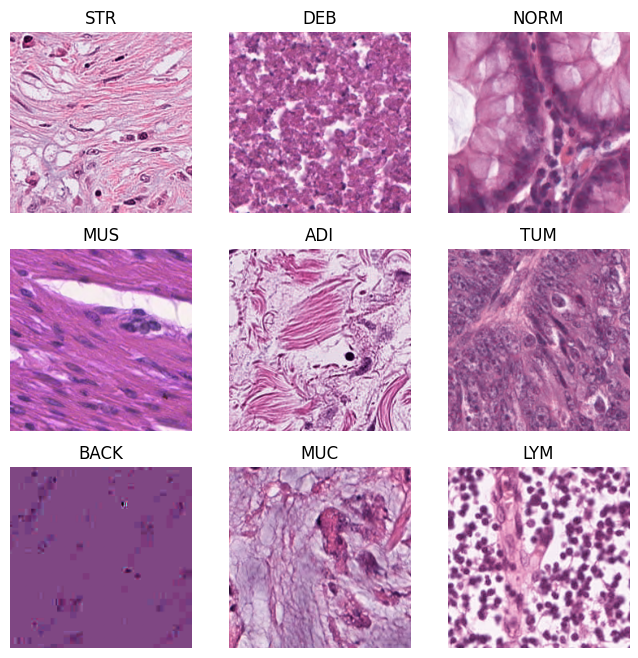

In [162]:
# Show one example per class from the training dataset
import matplotlib.pyplot as plt

# Prepare a dictionary to store one example per class
class_examples = {}
for images, labels in train_loader:
    for img, label in zip(images, labels):
        label = label.item()
        if label not in class_examples:
            class_examples[label] = img
        # Stop if we already have one example for each class
        if len(class_examples) == len(dataset.classes):
            break
    if len(class_examples) == len(dataset.classes):
        break

# Display the images and their labels
figure = plt.figure(figsize=(8, 8))
cols = 3  # You can adjust the number of columns as needed
rows = (len(dataset.classes) + cols - 1) // cols  # Calculate required rows
for i, (label, img) in enumerate(class_examples.items(), start=1):
    figure.add_subplot(rows, cols, i)
    plt.title(dataset.classes[label])
    plt.axis("off")
    plt.imshow(img.permute(1, 2, 0).numpy())  # Convert tensor to numpy for display
plt.show()

In [163]:
gumbel_params = []
other_params = []
exclude = ["head", "head_dist"]

for name, module in model.named_children():
    if name in exclude:
        print(exclude)

for name, param in model.named_parameters():
    if "gumbel_gate" in name:
        gumbel_params.append(param)
        print(name)
    else:
        other_params.append(param)

#model = convert_to_lora_model(model, exclude=exclude)

['head', 'head_dist']
['head', 'head_dist']
stage1.gumbel_gate
stage2.gumbel_gate


In [164]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam([
    {'params' : gumbel_params, 'lr': learning_rate * 10},
    {'params' : other_params, 'lr': learning_rate}
])

In [165]:
train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []

In [166]:
def train(model, train_loader, criterion, optimizer, device, epoch, num_epochs,
          use_bsda=False, bsda_layer=None, multi=10, bsda_alpha=0.5,
          kl_weight=8e-4, recon_weight=1.0, use_ori=True, total_epcohs=100):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    tau_max = 1
    tau_min = 0.1
    total_steps = total_epcohs * len(train_loader)
    train_steps = epoch * len(train_loader)

    ratio = min(bsda_alpha * (epoch / (num_epochs // 2)), bsda_alpha) if use_bsda else 0

    for i, (inputs, labels) in enumerate(tqdm(train_loader, desc="Training")):
        tau = (tau_max) - (tau_max - tau_min) * ((train_steps + i) / total_steps)
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        features = model.extract_features(inputs, tau=tau)
        y_hat = model.head(features)

        if use_bsda:
            m, mu, logvar, a_hat = bsda_layer(features, multi=multi)
            a_tilde = bsda_layer.calc_a_tilde(features, m, multi=multi)
            y_hat_tilde = model.head(a_tilde)

            loss_task = criterion(y_hat, labels)
            loss_task_tilde = criterion(y_hat_tilde, labels.repeat(multi,))
            loss_kl = bsda_layer.calc_kl_loss(mu, logvar)
            loss_recon = bsda_layer.calc_recon_loss(features, a_hat, multi)
            loss_bsda = kl_weight * loss_kl + recon_weight * loss_recon
            loss = loss_task_tilde + loss_bsda
            if use_ori:
                loss = loss * ratio + loss_task
        else:
            loss = criterion(y_hat, labels)

        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(y_hat, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    epoch_loss = running_loss / len(train_loader)
    accuracy = 100 * correct / total
    print(f"Train Loss: {epoch_loss:.4f}, Train Accuracy: {accuracy:.2f}%")
    print(f"Tau: {tau:.4f}")
    train_losses.append(epoch_loss)
    train_accuracies.append(accuracy)

    print("Each stage of block probabilities:")
    for name, module in model.named_modules():
        if isinstance(module, LevitStage_TinyFusion):
            gate_probs = torch.softmax(module.gumbel_gate, dim=0) # 각 block의 확률
            topk_indx = torch.topk(gate_probs, module.num_select).indices.tolist() # 상위 k개의 index
            print(f"{name}")
            for i, prob in enumerate(gate_probs):
                mask = " " if i in topk_indx else "*" # mask
                print(f"Block {i}: {prob:.4f} {mask}")


In [167]:
# Global variable to track the best validation loss
best_val_loss = float('inf')

def evaluate(model, data_loader, criterion, device, phase="Validation", epoch=0, total_epcohs=100, save_path="best_model.pth"):
    global best_val_loss
    model.eval()
    running_loss = 0.0
    correct = 0
    total = 0
    all_labels = []
    all_predictions = []
    tau_max = 1
    tau_min = 0.1
    total_steps = total_epcohs * len(data_loader)
    train_steps = epoch * len(data_loader)

    with torch.no_grad():
        for i, (inputs, labels) in enumerate(tqdm(data_loader, desc=f"{phase}")):
            inputs, labels = inputs.to(device), labels.to(device)
            if phase == "Validation":
                tau = (tau_max) - (tau_max - tau_min) * ((train_steps + i) / total_steps)
            elif phase == "Test":
                tau = 1e-5
            outputs = model(inputs, tau)
            loss = criterion(outputs, labels)

            running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

            # Save all labels and predictions for balanced accuracy
            all_labels.extend(labels.cpu().numpy())
            all_predictions.extend(predicted.cpu().numpy())

    epoch_loss = running_loss / len(data_loader)
    accuracy = 100 * correct / total
    balanced_acc = balanced_accuracy_score(all_labels, all_predictions)

    print(f"Tau: {tau:.4f}")
    print(f"{phase} Loss: {epoch_loss:.4f}, {phase} Accuracy: {accuracy:.2f}%")
    print(f"Balanced Accuracy: {balanced_acc:.4f}")

    if epoch_loss < best_val_loss:
        best_val_loss = epoch_loss
        torch.save(model.state_dict(), save_path)
        print(f"New best model saved with {phase} loss {epoch_loss:.4f} at {save_path}")

    val_losses.append(epoch_loss)
    val_accuracies.append(accuracy)

In [168]:
def measure_inference_time(model, data_loader, device):
    model.eval()
    times = []

    with torch.no_grad():
        for inputs, _ in data_loader:
            inputs = inputs.to(device)
            start_time = torch.cuda.Event(enable_timing=True)
            end_time = torch.cuda.Event(enable_timing=True)

            start_time.record()
            _ = model(inputs, tau=0.1)  # inference 수행
            end_time.record()

            # 시간 측정
            torch.cuda.synchronize()  # CUDA에서 모든 커널이 완료될 때까지 대기
            elapsed_time = start_time.elapsed_time(end_time)  # 밀리초 단위로 반환
            times.append(elapsed_time)

    # 통계량 계산
    times_np = np.array(times)
    total_inferences = len(times_np)
    avg_time = np.mean(times_np)
    std_dev = np.std(times_np)
    max_time = np.max(times_np)
    min_time = np.min(times_np)

    # 결과 출력
    print(f"Inference Time Measurement Results:")
    print(f"Total Inferences: {total_inferences}")
    print(f"Average Time: {avg_time:.2f} ms")
    print(f"Standard Deviation: {std_dev:.2f} ms")
    print(f"Maximum Time: {max_time:.2f} ms")
    print(f"Minimum Time: {min_time:.2f} ms")

    return times

In [169]:
# gumbel_gate 파라미터가 포함되어 있는지 확인
for name, param in model.named_parameters():
    print(f"Parameter name: {name}, requires_grad: {param.requires_grad}")

Parameter name: stem.conv1.linear.weight, requires_grad: True
Parameter name: stem.conv1.bn.weight, requires_grad: True
Parameter name: stem.conv1.bn.bias, requires_grad: True
Parameter name: stem.conv2.linear.weight, requires_grad: True
Parameter name: stem.conv2.bn.weight, requires_grad: True
Parameter name: stem.conv2.bn.bias, requires_grad: True
Parameter name: stem.conv3.linear.weight, requires_grad: True
Parameter name: stem.conv3.bn.weight, requires_grad: True
Parameter name: stem.conv3.bn.bias, requires_grad: True
Parameter name: stem.conv4.linear.weight, requires_grad: True
Parameter name: stem.conv4.bn.weight, requires_grad: True
Parameter name: stem.conv4.bn.bias, requires_grad: True
Parameter name: stage1.gumbel_gate, requires_grad: True
Parameter name: stage1.blocks.0.attn.qkv.linear.weight, requires_grad: True
Parameter name: stage1.blocks.0.attn.qkv.bn.weight, requires_grad: True
Parameter name: stage1.blocks.0.attn.qkv.bn.bias, requires_grad: True
Parameter name: stage1

In [170]:
def transfer_weights(pretrained_model: LevitDistilled, tinyfusion_model: LevitDistilledTinyfusion, num_blocks):

    pretrained_dict = pretrained_model.state_dict()
    tinyfusion_dict = tinyfusion_model.state_dict()

    new_state_dict = {}

    # 1️⃣ 공통된 가중치 복사 (stem, conv1x1, head, head_dist)
    for key in tinyfusion_dict.keys():
        if key in pretrained_dict and not key.startswith("stage"):
            new_state_dict[key] = pretrained_dict[key]

    stage = []
    for i in range(num_blocks):
        stage.append(f"stage{i}")
    # 2️⃣ stage1, stage2의 가중치 변환 적용
    for stage_name in stage:
        for i in range(num_blocks):  # num_blocks=4
            old_key = f"{stage_name}.blocks.{i}"  # 원래 모델의 key
            new_key = f"{stage_name}.blocks.{i}"  # TinyFusion 모델의 key

            if old_key in pretrained_dict and new_key in tinyfusion_dict:
                new_state_dict[new_key] = pretrained_dict[old_key]

    # 3️⃣ `gumble_gate`는 원래 모델에 없으므로, 초기화된 값 유지 (로드 안함)
    print("✅ 가중치 변환 완료! TinyFusion 모델에 적용합니다.")

    # 4️⃣ 변환된 가중치를 TinyFusion 모델에 로드 (strict=False)
    tinyfusion_model.load_state_dict(new_state_dict, strict=False)

In [171]:
pretrained_model = LevitDistilled(num_classes=9)
pretrained_model.stage1.blocks[0].attn.compute_attention_bias(14)
pretrained_model.stage1.blocks[1].attn.compute_attention_bias(14)
pretrained_model.stage1.blocks[2].attn.compute_attention_bias(14)
pretrained_model.stage1.blocks[3].attn.compute_attention_bias(14)
pretrained_model.stage2.blocks[0].attn.compute_attention_bias(7)
pretrained_model.stage2.blocks[1].attn.compute_attention_bias(7)
pretrained_model.stage2.blocks[2].attn.compute_attention_bias(7)
pretrained_model.stage2.blocks[3].attn.compute_attention_bias(7)
pretrained_model.load_state_dict(torch.load("HoViT_44_bsda_flip_fixed.pth"))

<All keys matched successfully>

In [172]:
transfer_weights(pretrained_model, model, num_blocks=4)

✅ 가중치 변환 완료! TinyFusion 모델에 적용합니다.


In [173]:
model = convert_to_lora_model(model, exclude=exclude)

In [174]:
# gumbel_gate 파라미터가 포함되어 있는지 확인
for name, param in model.named_parameters():
    print(f"Parameter name: {name}, requires_grad: {param.requires_grad}")

Parameter name: stem.conv1.linear.weight, requires_grad: True
Parameter name: stem.conv1.bn.weight, requires_grad: True
Parameter name: stem.conv1.bn.bias, requires_grad: True
Parameter name: stem.conv2.linear.weight, requires_grad: True
Parameter name: stem.conv2.bn.weight, requires_grad: True
Parameter name: stem.conv2.bn.bias, requires_grad: True
Parameter name: stem.conv3.linear.weight, requires_grad: True
Parameter name: stem.conv3.bn.weight, requires_grad: True
Parameter name: stem.conv3.bn.bias, requires_grad: True
Parameter name: stem.conv4.linear.weight, requires_grad: True
Parameter name: stem.conv4.bn.weight, requires_grad: True
Parameter name: stem.conv4.bn.bias, requires_grad: True
Parameter name: stage1.gumbel_gate, requires_grad: True
Parameter name: stage1.blocks.0.attn.qkv.linear.weight, requires_grad: True
Parameter name: stage1.blocks.0.attn.qkv.linear.lora_a.weight, requires_grad: True
Parameter name: stage1.blocks.0.attn.qkv.linear.lora_b.weight, requires_grad: Tru

In [175]:
for name, param in model.named_parameters():
    if "lora_a" in name or "lora_b" in name:
        param.requires_grad = True
        print(f"✅ LoRA Trainable: {name}")
    elif "gumbel_gate" in name:
        param.requires_grad = True
        print(f"✅ TinyFusion Trainable: {name}")
    elif "head" in name or "head_dist" in name:
        param.requires_grad = True
        print(f"✅ Head Trainable: {name}")
    elif "conv1x1" in name:
        param.requires_grad = True
        print(f"✅ Conv1x1 Trainable: {name}")
    #elif "attention_biases" in name:
        #param.requires_grad = True
        #print(f"✅ Attention Biases Trainable: {name}")
    else:
        param.requires_grad = False

✅ TinyFusion Trainable: stage1.gumbel_gate
✅ LoRA Trainable: stage1.blocks.0.attn.qkv.linear.lora_a.weight
✅ LoRA Trainable: stage1.blocks.0.attn.qkv.linear.lora_b.weight
✅ LoRA Trainable: stage1.blocks.0.attn.proj.1.linear.lora_a.weight
✅ LoRA Trainable: stage1.blocks.0.attn.proj.1.linear.lora_b.weight
✅ LoRA Trainable: stage1.blocks.0.mlp.ln1.linear.lora_a.weight
✅ LoRA Trainable: stage1.blocks.0.mlp.ln1.linear.lora_b.weight
✅ LoRA Trainable: stage1.blocks.0.mlp.ln2.linear.lora_a.weight
✅ LoRA Trainable: stage1.blocks.0.mlp.ln2.linear.lora_b.weight
✅ LoRA Trainable: stage1.blocks.1.attn.qkv.linear.lora_a.weight
✅ LoRA Trainable: stage1.blocks.1.attn.qkv.linear.lora_b.weight
✅ LoRA Trainable: stage1.blocks.1.attn.proj.1.linear.lora_a.weight
✅ LoRA Trainable: stage1.blocks.1.attn.proj.1.linear.lora_b.weight
✅ LoRA Trainable: stage1.blocks.1.mlp.ln1.linear.lora_a.weight
✅ LoRA Trainable: stage1.blocks.1.mlp.ln1.linear.lora_b.weight
✅ LoRA Trainable: stage1.blocks.1.mlp.ln2.linear.lora_a

In [176]:
# gumbel_gate 파라미터가 포함되어 있는지 확인
for name, param in model.named_parameters():
    print(f"Parameter name: {name}, requires_grad: {param.requires_grad}")

Parameter name: stem.conv1.linear.weight, requires_grad: False
Parameter name: stem.conv1.bn.weight, requires_grad: False
Parameter name: stem.conv1.bn.bias, requires_grad: False
Parameter name: stem.conv2.linear.weight, requires_grad: False
Parameter name: stem.conv2.bn.weight, requires_grad: False
Parameter name: stem.conv2.bn.bias, requires_grad: False
Parameter name: stem.conv3.linear.weight, requires_grad: False
Parameter name: stem.conv3.bn.weight, requires_grad: False
Parameter name: stem.conv3.bn.bias, requires_grad: False
Parameter name: stem.conv4.linear.weight, requires_grad: False
Parameter name: stem.conv4.bn.weight, requires_grad: False
Parameter name: stem.conv4.bn.bias, requires_grad: False
Parameter name: stage1.gumbel_gate, requires_grad: True
Parameter name: stage1.blocks.0.attn.qkv.linear.weight, requires_grad: False
Parameter name: stage1.blocks.0.attn.qkv.linear.lora_a.weight, requires_grad: True
Parameter name: stage1.blocks.0.attn.qkv.linear.lora_b.weight, requi

In [177]:
bsda_layer = BSDALayer(feature_dim=512, bsda_lambda=0.8).to(device)

for epoch in range(num_epochs):
    print(f"\nEpoch {epoch+1}/{num_epochs}")
    train(model, train_loader, criterion, optimizer, device, epoch,
          use_bsda=True,
          bsda_layer=bsda_layer,
          multi=10,
          bsda_alpha=0.5,
          kl_weight=8e-4,
          recon_weight=1.0,
          use_ori=True,
          num_epochs=num_epochs)
    evaluate(model, val_loader, criterion, device, phase="Validation", epoch=epoch)


Epoch 1/100


Training: 100%|██████████| 2188/2188 [03:12<00:00, 11.34it/s]


Train Loss: 0.4597, Train Accuracy: 87.66%
Tau: 0.9910
Each stage of block probabilities:
stage1
Block 0: 0.7708  
Block 1: 0.1082  
Block 2: 0.0588 *
Block 3: 0.0622 *
stage2
Block 0: 0.1608 *
Block 1: 0.4780  
Block 2: 0.1930  
Block 3: 0.1682 *


Validation: 100%|██████████| 469/469 [00:21<00:00, 22.33it/s]


Tau: 0.9910
Validation Loss: 1.7850, Validation Accuracy: 32.33%
Balanced Accuracy: 0.3183
New best model saved with Validation loss 1.7850 at best_model.pth

Epoch 2/100


Training: 100%|██████████| 2188/2188 [03:11<00:00, 11.44it/s]


Train Loss: 0.1939, Train Accuracy: 94.57%
Tau: 0.9820
Each stage of block probabilities:
stage1
Block 0: 0.9450  
Block 1: 0.0267  
Block 2: 0.0145 *
Block 3: 0.0138 *
stage2
Block 0: 0.1375 *
Block 1: 0.6236  
Block 2: 0.1615  
Block 3: 0.0774 *


Validation: 100%|██████████| 469/469 [00:20<00:00, 22.45it/s]


Tau: 0.9820
Validation Loss: 0.8558, Validation Accuracy: 71.99%
Balanced Accuracy: 0.7186
New best model saved with Validation loss 0.8558 at best_model.pth

Epoch 3/100


Training: 100%|██████████| 2188/2188 [03:12<00:00, 11.38it/s]


Train Loss: 0.1690, Train Accuracy: 95.93%
Tau: 0.9730
Each stage of block probabilities:
stage1
Block 0: 0.9836  
Block 1: 0.0083  
Block 2: 0.0048 *
Block 3: 0.0033 *
stage2
Block 0: 0.0665  
Block 1: 0.8542  
Block 2: 0.0573 *
Block 3: 0.0219 *


Validation: 100%|██████████| 469/469 [00:20<00:00, 22.45it/s]


Tau: 0.9730
Validation Loss: 0.4593, Validation Accuracy: 86.39%
Balanced Accuracy: 0.8578
New best model saved with Validation loss 0.4593 at best_model.pth

Epoch 4/100


Training: 100%|██████████| 2188/2188 [03:12<00:00, 11.38it/s]


Train Loss: 0.1598, Train Accuracy: 96.63%
Tau: 0.9640
Each stage of block probabilities:
stage1
Block 0: 0.9941  
Block 1: 0.0032  
Block 2: 0.0016 *
Block 3: 0.0011 *
stage2
Block 0: 0.0355  
Block 1: 0.9273  
Block 2: 0.0273 *
Block 3: 0.0099 *


Validation: 100%|██████████| 469/469 [00:20<00:00, 22.41it/s]


Tau: 0.9640
Validation Loss: 0.2866, Validation Accuracy: 91.98%
Balanced Accuracy: 0.9151
New best model saved with Validation loss 0.2866 at best_model.pth

Epoch 5/100


Training: 100%|██████████| 2188/2188 [03:10<00:00, 11.52it/s]


Train Loss: 0.1561, Train Accuracy: 97.21%
Tau: 0.9550
Each stage of block probabilities:
stage1
Block 0: 0.9974  
Block 1: 0.0014  
Block 2: 0.0006 *
Block 3: 0.0005 *
stage2
Block 0: 0.0174  
Block 1: 0.9630  
Block 2: 0.0151 *
Block 3: 0.0045 *


Validation: 100%|██████████| 469/469 [00:20<00:00, 22.59it/s]


Tau: 0.9550
Validation Loss: 0.2125, Validation Accuracy: 93.91%
Balanced Accuracy: 0.9350
New best model saved with Validation loss 0.2125 at best_model.pth

Epoch 6/100


Training: 100%|██████████| 2188/2188 [03:11<00:00, 11.44it/s]


Train Loss: 0.1583, Train Accuracy: 97.42%
Tau: 0.9460
Each stage of block probabilities:
stage1
Block 0: 0.9987  
Block 1: 0.0006  
Block 2: 0.0003 *
Block 3: 0.0003 *
stage2
Block 0: 0.0067  
Block 1: 0.9855  
Block 2: 0.0057 *
Block 3: 0.0021 *


Validation: 100%|██████████| 469/469 [00:20<00:00, 22.41it/s]


Tau: 0.9460
Validation Loss: 0.1706, Validation Accuracy: 94.92%
Balanced Accuracy: 0.9468
New best model saved with Validation loss 0.1706 at best_model.pth

Epoch 7/100


Training: 100%|██████████| 2188/2188 [03:11<00:00, 11.41it/s]


Train Loss: 0.1619, Train Accuracy: 97.63%
Tau: 0.9370
Each stage of block probabilities:
stage1
Block 0: 0.9991  
Block 1: 0.0004  
Block 2: 0.0002 *
Block 3: 0.0003 *
stage2
Block 0: 0.0027 *
Block 1: 0.9922  
Block 2: 0.0038  
Block 3: 0.0013 *


Validation: 100%|██████████| 469/469 [00:20<00:00, 22.63it/s]


Tau: 0.9370
Validation Loss: 0.1520, Validation Accuracy: 95.43%
Balanced Accuracy: 0.9515
New best model saved with Validation loss 0.1520 at best_model.pth

Epoch 8/100


Training: 100%|██████████| 2188/2188 [03:11<00:00, 11.43it/s]


Train Loss: 0.1649, Train Accuracy: 97.90%
Tau: 0.9280
Each stage of block probabilities:
stage1
Block 0: 0.9994  
Block 1: 0.0003  
Block 2: 0.0001 *
Block 3: 0.0002 *
stage2
Block 0: 0.0011 *
Block 1: 0.9967  
Block 2: 0.0015  
Block 3: 0.0007 *


Validation: 100%|██████████| 469/469 [00:20<00:00, 22.40it/s]


Tau: 0.9280
Validation Loss: 0.1340, Validation Accuracy: 95.90%
Balanced Accuracy: 0.9572
New best model saved with Validation loss 0.1340 at best_model.pth

Epoch 9/100


Training: 100%|██████████| 2188/2188 [03:11<00:00, 11.44it/s]


Train Loss: 0.1708, Train Accuracy: 98.01%
Tau: 0.9190
Each stage of block probabilities:
stage1
Block 0: 0.9996  
Block 1: 0.0002  
Block 2: 0.0001 *
Block 3: 0.0001 *
stage2
Block 0: 0.0007 *
Block 1: 0.9975  
Block 2: 0.0011  
Block 3: 0.0006 *


Validation: 100%|██████████| 469/469 [00:20<00:00, 22.63it/s]


Tau: 0.9190
Validation Loss: 0.1247, Validation Accuracy: 96.03%
Balanced Accuracy: 0.9584
New best model saved with Validation loss 0.1247 at best_model.pth

Epoch 10/100


Training: 100%|██████████| 2188/2188 [03:11<00:00, 11.42it/s]


Train Loss: 0.1764, Train Accuracy: 98.15%
Tau: 0.9100
Each stage of block probabilities:
stage1
Block 0: 0.9997  
Block 1: 0.0001  
Block 2: 0.0001 *
Block 3: 0.0001 *
stage2
Block 0: 0.0004 *
Block 1: 0.9987  
Block 2: 0.0007  
Block 3: 0.0002 *


Validation: 100%|██████████| 469/469 [00:20<00:00, 22.55it/s]


Tau: 0.9100
Validation Loss: 0.1140, Validation Accuracy: 96.41%
Balanced Accuracy: 0.9631
New best model saved with Validation loss 0.1140 at best_model.pth

Epoch 11/100


Training: 100%|██████████| 2188/2188 [03:11<00:00, 11.41it/s]


Train Loss: 0.1821, Train Accuracy: 98.26%
Tau: 0.9010
Each stage of block probabilities:
stage1
Block 0: 0.9998  
Block 1: 0.0001  
Block 2: 0.0001 *
Block 3: 0.0001 *
stage2
Block 0: 0.0004 *
Block 1: 0.9988  
Block 2: 0.0006  
Block 3: 0.0002 *


Validation: 100%|██████████| 469/469 [00:20<00:00, 22.57it/s]


Tau: 0.9010
Validation Loss: 0.1090, Validation Accuracy: 96.54%
Balanced Accuracy: 0.9642
New best model saved with Validation loss 0.1090 at best_model.pth

Epoch 12/100


Training: 100%|██████████| 2188/2188 [03:12<00:00, 11.39it/s]


Train Loss: 0.1891, Train Accuracy: 98.35%
Tau: 0.8920
Each stage of block probabilities:
stage1
Block 0: 0.9998  
Block 1: 0.0001  
Block 2: 0.0000 *
Block 3: 0.0001 *
stage2
Block 0: 0.0001 *
Block 1: 0.9993  
Block 2: 0.0004  
Block 3: 0.0001 *


Validation: 100%|██████████| 469/469 [00:20<00:00, 22.54it/s]


Tau: 0.8920
Validation Loss: 0.1032, Validation Accuracy: 96.64%
Balanced Accuracy: 0.9655
New best model saved with Validation loss 0.1032 at best_model.pth

Epoch 13/100


Training: 100%|██████████| 2188/2188 [03:11<00:00, 11.42it/s]


Train Loss: 0.1950, Train Accuracy: 98.46%
Tau: 0.8830
Each stage of block probabilities:
stage1
Block 0: 0.9999  
Block 1: 0.0001  
Block 2: 0.0000 *
Block 3: 0.0000 *
stage2
Block 0: 0.0001 *
Block 1: 0.9995  
Block 2: 0.0003  
Block 3: 0.0001 *


Validation: 100%|██████████| 469/469 [00:20<00:00, 22.66it/s]


Tau: 0.8830
Validation Loss: 0.0983, Validation Accuracy: 96.76%
Balanced Accuracy: 0.9670
New best model saved with Validation loss 0.0983 at best_model.pth

Epoch 14/100


Training: 100%|██████████| 2188/2188 [03:11<00:00, 11.43it/s]


Train Loss: 0.2015, Train Accuracy: 98.51%
Tau: 0.8740
Each stage of block probabilities:
stage1
Block 0: 0.9999  
Block 1: 0.0000  
Block 2: 0.0000 *
Block 3: 0.0000 *
stage2
Block 0: 0.0001 *
Block 1: 0.9996  
Block 2: 0.0002  
Block 3: 0.0001 *


Validation: 100%|██████████| 469/469 [00:20<00:00, 22.60it/s]


Tau: 0.8740
Validation Loss: 0.0955, Validation Accuracy: 96.83%
Balanced Accuracy: 0.9676
New best model saved with Validation loss 0.0955 at best_model.pth

Epoch 15/100


Training: 100%|██████████| 2188/2188 [03:11<00:00, 11.41it/s]


Train Loss: 0.2094, Train Accuracy: 98.47%
Tau: 0.8650
Each stage of block probabilities:
stage1
Block 0: 0.9999  
Block 1: 0.0000  
Block 2: 0.0000 *
Block 3: 0.0000 *
stage2
Block 0: 0.0000 *
Block 1: 0.9997  
Block 2: 0.0002  
Block 3: 0.0001 *


Validation: 100%|██████████| 469/469 [00:20<00:00, 22.51it/s]


Tau: 0.8650
Validation Loss: 0.0926, Validation Accuracy: 96.84%
Balanced Accuracy: 0.9677
New best model saved with Validation loss 0.0926 at best_model.pth

Epoch 16/100


Training: 100%|██████████| 2188/2188 [03:11<00:00, 11.44it/s]


Train Loss: 0.2163, Train Accuracy: 98.57%
Tau: 0.8560
Each stage of block probabilities:
stage1
Block 0: 0.9999  
Block 1: 0.0000 *
Block 2: 0.0000  
Block 3: 0.0000 *
stage2
Block 0: 0.0000 *
Block 1: 0.9998  
Block 2: 0.0001  
Block 3: 0.0000 *


Validation: 100%|██████████| 469/469 [00:20<00:00, 22.78it/s]


Tau: 0.8560
Validation Loss: 0.0911, Validation Accuracy: 96.91%
Balanced Accuracy: 0.9684
New best model saved with Validation loss 0.0911 at best_model.pth

Epoch 17/100


Training: 100%|██████████| 2188/2188 [03:11<00:00, 11.43it/s]


Train Loss: 0.2225, Train Accuracy: 98.62%
Tau: 0.8470
Each stage of block probabilities:
stage1
Block 0: 0.9999  
Block 1: 0.0000 *
Block 2: 0.0000  
Block 3: 0.0000 *
stage2
Block 0: 0.0000 *
Block 1: 0.9998  
Block 2: 0.0001  
Block 3: 0.0001 *


Validation: 100%|██████████| 469/469 [00:20<00:00, 22.59it/s]


Tau: 0.8470
Validation Loss: 0.0888, Validation Accuracy: 96.93%
Balanced Accuracy: 0.9687
New best model saved with Validation loss 0.0888 at best_model.pth

Epoch 18/100


Training: 100%|██████████| 2188/2188 [03:11<00:00, 11.40it/s]


Train Loss: 0.2300, Train Accuracy: 98.63%
Tau: 0.8380
Each stage of block probabilities:
stage1
Block 0: 0.9999  
Block 1: 0.0000 *
Block 2: 0.0000  
Block 3: 0.0000 *
stage2
Block 0: 0.0000 *
Block 1: 0.9998  
Block 2: 0.0001  
Block 3: 0.0000 *


Validation: 100%|██████████| 469/469 [00:20<00:00, 22.34it/s]


Tau: 0.8380
Validation Loss: 0.0860, Validation Accuracy: 97.03%
Balanced Accuracy: 0.9695
New best model saved with Validation loss 0.0860 at best_model.pth

Epoch 19/100


Training: 100%|██████████| 2188/2188 [03:11<00:00, 11.45it/s]


Train Loss: 0.2362, Train Accuracy: 98.74%
Tau: 0.8290
Each stage of block probabilities:
stage1
Block 0: 1.0000  
Block 1: 0.0000 *
Block 2: 0.0000  
Block 3: 0.0000 *
stage2
Block 0: 0.0000 *
Block 1: 0.9999  
Block 2: 0.0001  
Block 3: 0.0000 *


Validation: 100%|██████████| 469/469 [00:20<00:00, 22.51it/s]


Tau: 0.8290
Validation Loss: 0.0821, Validation Accuracy: 97.17%
Balanced Accuracy: 0.9711
New best model saved with Validation loss 0.0821 at best_model.pth

Epoch 20/100


Training: 100%|██████████| 2188/2188 [03:12<00:00, 11.39it/s]


Train Loss: 0.2441, Train Accuracy: 98.76%
Tau: 0.8200
Each stage of block probabilities:
stage1
Block 0: 1.0000  
Block 1: 0.0000 *
Block 2: 0.0000  
Block 3: 0.0000 *
stage2
Block 0: 0.0000 *
Block 1: 0.9999  
Block 2: 0.0001  
Block 3: 0.0000 *


Validation: 100%|██████████| 469/469 [00:20<00:00, 22.35it/s]


Tau: 0.8200
Validation Loss: 0.0823, Validation Accuracy: 97.22%
Balanced Accuracy: 0.9716

Epoch 21/100


Training: 100%|██████████| 2188/2188 [03:11<00:00, 11.41it/s]


Train Loss: 0.2524, Train Accuracy: 98.73%
Tau: 0.8110
Each stage of block probabilities:
stage1
Block 0: 1.0000  
Block 1: 0.0000 *
Block 2: 0.0000  
Block 3: 0.0000 *
stage2
Block 0: 0.0000 *
Block 1: 0.9998  
Block 2: 0.0001  
Block 3: 0.0000 *


Validation: 100%|██████████| 469/469 [00:20<00:00, 22.35it/s]


Tau: 0.8110
Validation Loss: 0.0813, Validation Accuracy: 97.30%
Balanced Accuracy: 0.9723
New best model saved with Validation loss 0.0813 at best_model.pth

Epoch 22/100


Training: 100%|██████████| 2188/2188 [03:11<00:00, 11.42it/s]


Train Loss: 0.2598, Train Accuracy: 98.78%
Tau: 0.8020
Each stage of block probabilities:
stage1
Block 0: 1.0000  
Block 1: 0.0000 *
Block 2: 0.0000  
Block 3: 0.0000 *
stage2
Block 0: 0.0000 *
Block 1: 0.9998  
Block 2: 0.0001  
Block 3: 0.0001 *


Validation: 100%|██████████| 469/469 [00:20<00:00, 22.46it/s]


Tau: 0.8020
Validation Loss: 0.0799, Validation Accuracy: 97.34%
Balanced Accuracy: 0.9728
New best model saved with Validation loss 0.0799 at best_model.pth

Epoch 23/100


Training: 100%|██████████| 2188/2188 [03:12<00:00, 11.35it/s]


Train Loss: 0.2656, Train Accuracy: 98.87%
Tau: 0.7930
Each stage of block probabilities:
stage1
Block 0: 1.0000  
Block 1: 0.0000 *
Block 2: 0.0000  
Block 3: 0.0000 *
stage2
Block 0: 0.0000 *
Block 1: 0.9997  
Block 2: 0.0002  
Block 3: 0.0001 *


Validation: 100%|██████████| 469/469 [00:21<00:00, 22.02it/s]


Tau: 0.7930
Validation Loss: 0.0776, Validation Accuracy: 97.42%
Balanced Accuracy: 0.9735
New best model saved with Validation loss 0.0776 at best_model.pth

Epoch 24/100


Training: 100%|██████████| 2188/2188 [03:14<00:00, 11.27it/s]


Train Loss: 0.2743, Train Accuracy: 98.89%
Tau: 0.7840
Each stage of block probabilities:
stage1
Block 0: 1.0000  
Block 1: 0.0000 *
Block 2: 0.0000  
Block 3: 0.0000 *
stage2
Block 0: 0.0000 *
Block 1: 0.9998  
Block 2: 0.0001  
Block 3: 0.0001 *


Validation: 100%|██████████| 469/469 [00:21<00:00, 22.21it/s]


Tau: 0.7840
Validation Loss: 0.0765, Validation Accuracy: 97.46%
Balanced Accuracy: 0.9741
New best model saved with Validation loss 0.0765 at best_model.pth

Epoch 25/100


Training: 100%|██████████| 2188/2188 [03:14<00:00, 11.26it/s]


Train Loss: 0.2814, Train Accuracy: 98.91%
Tau: 0.7750
Each stage of block probabilities:
stage1
Block 0: 1.0000  
Block 1: 0.0000 *
Block 2: 0.0000 *
Block 3: 0.0000  
stage2
Block 0: 0.0000 *
Block 1: 0.9999  
Block 2: 0.0001  
Block 3: 0.0000 *


Validation: 100%|██████████| 469/469 [00:20<00:00, 22.37it/s]


Tau: 0.7750
Validation Loss: 0.0760, Validation Accuracy: 97.46%
Balanced Accuracy: 0.9740
New best model saved with Validation loss 0.0760 at best_model.pth

Epoch 26/100


Training: 100%|██████████| 2188/2188 [03:12<00:00, 11.35it/s]


Train Loss: 0.2889, Train Accuracy: 98.88%
Tau: 0.7660
Each stage of block probabilities:
stage1
Block 0: 1.0000  
Block 1: 0.0000 *
Block 2: 0.0000 *
Block 3: 0.0000  
stage2
Block 0: 0.0000 *
Block 1: 0.9999  
Block 2: 0.0001  
Block 3: 0.0000 *


Validation: 100%|██████████| 469/469 [00:21<00:00, 22.23it/s]


Tau: 0.7660
Validation Loss: 0.0745, Validation Accuracy: 97.52%
Balanced Accuracy: 0.9747
New best model saved with Validation loss 0.0745 at best_model.pth

Epoch 27/100


Training: 100%|██████████| 2188/2188 [03:12<00:00, 11.37it/s]


Train Loss: 0.2967, Train Accuracy: 98.91%
Tau: 0.7570
Each stage of block probabilities:
stage1
Block 0: 1.0000  
Block 1: 0.0000 *
Block 2: 0.0000 *
Block 3: 0.0000  
stage2
Block 0: 0.0000 *
Block 1: 0.9999  
Block 2: 0.0000  
Block 3: 0.0000 *


Validation: 100%|██████████| 469/469 [00:20<00:00, 22.44it/s]


Tau: 0.7570
Validation Loss: 0.0742, Validation Accuracy: 97.53%
Balanced Accuracy: 0.9747
New best model saved with Validation loss 0.0742 at best_model.pth

Epoch 28/100


Training: 100%|██████████| 2188/2188 [03:12<00:00, 11.39it/s]


Train Loss: 0.3037, Train Accuracy: 98.97%
Tau: 0.7480
Each stage of block probabilities:
stage1
Block 0: 1.0000  
Block 1: 0.0000 *
Block 2: 0.0000 *
Block 3: 0.0000  
stage2
Block 0: 0.0000 *
Block 1: 0.9999  
Block 2: 0.0001  
Block 3: 0.0000 *


Validation: 100%|██████████| 469/469 [00:21<00:00, 22.30it/s]


Tau: 0.7480
Validation Loss: 0.0738, Validation Accuracy: 97.53%
Balanced Accuracy: 0.9748
New best model saved with Validation loss 0.0738 at best_model.pth

Epoch 29/100


Training: 100%|██████████| 2188/2188 [03:13<00:00, 11.30it/s]


Train Loss: 0.3111, Train Accuracy: 98.95%
Tau: 0.7390
Each stage of block probabilities:
stage1
Block 0: 1.0000  
Block 1: 0.0000 *
Block 2: 0.0000 *
Block 3: 0.0000  
stage2
Block 0: 0.0000 *
Block 1: 0.9999  
Block 2: 0.0000  
Block 3: 0.0000 *


Validation: 100%|██████████| 469/469 [00:20<00:00, 22.35it/s]


Tau: 0.7390
Validation Loss: 0.0721, Validation Accuracy: 97.69%
Balanced Accuracy: 0.9765
New best model saved with Validation loss 0.0721 at best_model.pth

Epoch 30/100


Training: 100%|██████████| 2188/2188 [03:12<00:00, 11.39it/s]


Train Loss: 0.3187, Train Accuracy: 98.94%
Tau: 0.7300
Each stage of block probabilities:
stage1
Block 0: 1.0000  
Block 1: 0.0000 *
Block 2: 0.0000 *
Block 3: 0.0000  
stage2
Block 0: 0.0000 *
Block 1: 0.9999  
Block 2: 0.0000  
Block 3: 0.0000 *


Validation: 100%|██████████| 469/469 [00:20<00:00, 22.52it/s]


Tau: 0.7300
Validation Loss: 0.0716, Validation Accuracy: 97.67%
Balanced Accuracy: 0.9763
New best model saved with Validation loss 0.0716 at best_model.pth

Epoch 31/100


Training: 100%|██████████| 2188/2188 [03:12<00:00, 11.34it/s]


Train Loss: 0.3262, Train Accuracy: 98.93%
Tau: 0.7210
Each stage of block probabilities:
stage1
Block 0: 1.0000  
Block 1: 0.0000 *
Block 2: 0.0000 *
Block 3: 0.0000  
stage2
Block 0: 0.0000 *
Block 1: 0.9999  
Block 2: 0.0000  
Block 3: 0.0000 *


Validation: 100%|██████████| 469/469 [00:21<00:00, 22.28it/s]


Tau: 0.7210
Validation Loss: 0.0698, Validation Accuracy: 97.69%
Balanced Accuracy: 0.9766
New best model saved with Validation loss 0.0698 at best_model.pth

Epoch 32/100


Training: 100%|██████████| 2188/2188 [03:12<00:00, 11.37it/s]


Train Loss: 0.3340, Train Accuracy: 98.94%
Tau: 0.7120
Each stage of block probabilities:
stage1
Block 0: 1.0000  
Block 1: 0.0000 *
Block 2: 0.0000  
Block 3: 0.0000 *
stage2
Block 0: 0.0000 *
Block 1: 1.0000  
Block 2: 0.0000  
Block 3: 0.0000 *


Validation: 100%|██████████| 469/469 [00:20<00:00, 22.39it/s]


Tau: 0.7120
Validation Loss: 0.0702, Validation Accuracy: 97.69%
Balanced Accuracy: 0.9765

Epoch 33/100


Training: 100%|██████████| 2188/2188 [03:11<00:00, 11.40it/s]


Train Loss: 0.3418, Train Accuracy: 98.93%
Tau: 0.7030
Each stage of block probabilities:
stage1
Block 0: 1.0000  
Block 1: 0.0000 *
Block 2: 0.0000  
Block 3: 0.0000 *
stage2
Block 0: 0.0000 *
Block 1: 1.0000  
Block 2: 0.0000  
Block 3: 0.0000 *


Validation: 100%|██████████| 469/469 [00:20<00:00, 22.62it/s]


Tau: 0.7030
Validation Loss: 0.0703, Validation Accuracy: 97.72%
Balanced Accuracy: 0.9769

Epoch 34/100


Training: 100%|██████████| 2188/2188 [03:12<00:00, 11.35it/s]


Train Loss: 0.3496, Train Accuracy: 98.98%
Tau: 0.6940
Each stage of block probabilities:
stage1
Block 0: 1.0000  
Block 1: 0.0000 *
Block 2: 0.0000  
Block 3: 0.0000 *
stage2
Block 0: 0.0000 *
Block 1: 1.0000  
Block 2: 0.0000  
Block 3: 0.0000 *


Validation: 100%|██████████| 469/469 [00:20<00:00, 22.41it/s]


Tau: 0.6940
Validation Loss: 0.0691, Validation Accuracy: 97.74%
Balanced Accuracy: 0.9771
New best model saved with Validation loss 0.0691 at best_model.pth

Epoch 35/100


Training: 100%|██████████| 2188/2188 [03:13<00:00, 11.33it/s]


Train Loss: 0.3570, Train Accuracy: 98.96%
Tau: 0.6850
Each stage of block probabilities:
stage1
Block 0: 1.0000  
Block 1: 0.0000 *
Block 2: 0.0000  
Block 3: 0.0000 *
stage2
Block 0: 0.0000 *
Block 1: 1.0000  
Block 2: 0.0000  
Block 3: 0.0000 *


Validation: 100%|██████████| 469/469 [00:20<00:00, 22.34it/s]


Tau: 0.6850
Validation Loss: 0.0685, Validation Accuracy: 97.71%
Balanced Accuracy: 0.9769
New best model saved with Validation loss 0.0685 at best_model.pth

Epoch 36/100


Training: 100%|██████████| 2188/2188 [03:11<00:00, 11.41it/s]


Train Loss: 0.3641, Train Accuracy: 98.98%
Tau: 0.6760
Each stage of block probabilities:
stage1
Block 0: 1.0000  
Block 1: 0.0000 *
Block 2: 0.0000  
Block 3: 0.0000 *
stage2
Block 0: 0.0000 *
Block 1: 1.0000  
Block 2: 0.0000  
Block 3: 0.0000 *


Validation: 100%|██████████| 469/469 [00:20<00:00, 22.41it/s]


Tau: 0.6760
Validation Loss: 0.0676, Validation Accuracy: 97.81%
Balanced Accuracy: 0.9780
New best model saved with Validation loss 0.0676 at best_model.pth

Epoch 37/100


Training: 100%|██████████| 2188/2188 [03:13<00:00, 11.33it/s]


Train Loss: 0.3719, Train Accuracy: 99.01%
Tau: 0.6670
Each stage of block probabilities:
stage1
Block 0: 1.0000  
Block 1: 0.0000 *
Block 2: 0.0000 *
Block 3: 0.0000  
stage2
Block 0: 0.0000 *
Block 1: 1.0000  
Block 2: 0.0000  
Block 3: 0.0000 *


Validation: 100%|██████████| 469/469 [00:20<00:00, 22.42it/s]


Tau: 0.6670
Validation Loss: 0.0692, Validation Accuracy: 97.74%
Balanced Accuracy: 0.9773

Epoch 38/100


Training: 100%|██████████| 2188/2188 [03:12<00:00, 11.39it/s]


Train Loss: 0.3789, Train Accuracy: 99.01%
Tau: 0.6580
Each stage of block probabilities:
stage1
Block 0: 1.0000  
Block 1: 0.0000  
Block 2: 0.0000 *
Block 3: 0.0000 *
stage2
Block 0: 0.0000 *
Block 1: 1.0000  
Block 2: 0.0000 *
Block 3: 0.0000  


Validation: 100%|██████████| 469/469 [00:20<00:00, 22.37it/s]


Tau: 0.6580
Validation Loss: 0.0678, Validation Accuracy: 97.81%
Balanced Accuracy: 0.9781

Epoch 39/100


Training: 100%|██████████| 2188/2188 [03:11<00:00, 11.42it/s]


Train Loss: 0.3875, Train Accuracy: 98.99%
Tau: 0.6490
Each stage of block probabilities:
stage1
Block 0: 1.0000  
Block 1: 0.0000  
Block 2: 0.0000 *
Block 3: 0.0000 *
stage2
Block 0: 0.0000 *
Block 1: 1.0000  
Block 2: 0.0000 *
Block 3: 0.0000  


Validation: 100%|██████████| 469/469 [00:20<00:00, 22.41it/s]


Tau: 0.6490
Validation Loss: 0.0672, Validation Accuracy: 97.79%
Balanced Accuracy: 0.9778
New best model saved with Validation loss 0.0672 at best_model.pth

Epoch 40/100


Training: 100%|██████████| 2188/2188 [03:14<00:00, 11.23it/s]


Train Loss: 0.3943, Train Accuracy: 99.01%
Tau: 0.6400
Each stage of block probabilities:
stage1
Block 0: 1.0000  
Block 1: 0.0000  
Block 2: 0.0000 *
Block 3: 0.0000 *
stage2
Block 0: 0.0000 *
Block 1: 1.0000  
Block 2: 0.0000  
Block 3: 0.0000 *


Validation: 100%|██████████| 469/469 [00:21<00:00, 22.30it/s]


Tau: 0.6400
Validation Loss: 0.0661, Validation Accuracy: 97.85%
Balanced Accuracy: 0.9782
New best model saved with Validation loss 0.0661 at best_model.pth

Epoch 41/100


Training: 100%|██████████| 2188/2188 [03:13<00:00, 11.31it/s]


Train Loss: 0.4019, Train Accuracy: 98.99%
Tau: 0.6310
Each stage of block probabilities:
stage1
Block 0: 1.0000  
Block 1: 0.0000  
Block 2: 0.0000 *
Block 3: 0.0000 *
stage2
Block 0: 0.0000 *
Block 1: 1.0000  
Block 2: 0.0000  
Block 3: 0.0000 *


Validation: 100%|██████████| 469/469 [00:21<00:00, 22.11it/s]


Tau: 0.6310
Validation Loss: 0.0652, Validation Accuracy: 97.86%
Balanced Accuracy: 0.9785
New best model saved with Validation loss 0.0652 at best_model.pth

Epoch 42/100


Training: 100%|██████████| 2188/2188 [03:12<00:00, 11.34it/s]


Train Loss: 0.4099, Train Accuracy: 98.98%
Tau: 0.6220
Each stage of block probabilities:
stage1
Block 0: 1.0000  
Block 1: 0.0000  
Block 2: 0.0000 *
Block 3: 0.0000 *
stage2
Block 0: 0.0000 *
Block 1: 1.0000  
Block 2: 0.0000  
Block 3: 0.0000 *


Validation: 100%|██████████| 469/469 [00:20<00:00, 22.37it/s]


Tau: 0.6220
Validation Loss: 0.0655, Validation Accuracy: 97.87%
Balanced Accuracy: 0.9785

Epoch 43/100


Training: 100%|██████████| 2188/2188 [03:13<00:00, 11.33it/s]


Train Loss: 0.4182, Train Accuracy: 99.00%
Tau: 0.6130
Each stage of block probabilities:
stage1
Block 0: 1.0000  
Block 1: 0.0000  
Block 2: 0.0000 *
Block 3: 0.0000 *
stage2
Block 0: 0.0000 *
Block 1: 1.0000  
Block 2: 0.0000  
Block 3: 0.0000 *


Validation: 100%|██████████| 469/469 [00:20<00:00, 22.43it/s]


Tau: 0.6130
Validation Loss: 0.0644, Validation Accuracy: 97.87%
Balanced Accuracy: 0.9786
New best model saved with Validation loss 0.0644 at best_model.pth

Epoch 44/100


Training: 100%|██████████| 2188/2188 [03:13<00:00, 11.32it/s]


Train Loss: 0.4243, Train Accuracy: 99.07%
Tau: 0.6040
Each stage of block probabilities:
stage1
Block 0: 1.0000  
Block 1: 0.0000  
Block 2: 0.0000 *
Block 3: 0.0000 *
stage2
Block 0: 0.0000 *
Block 1: 1.0000  
Block 2: 0.0000  
Block 3: 0.0000 *


Validation: 100%|██████████| 469/469 [00:20<00:00, 22.48it/s]


Tau: 0.6040
Validation Loss: 0.0652, Validation Accuracy: 97.90%
Balanced Accuracy: 0.9790

Epoch 45/100


Training: 100%|██████████| 2188/2188 [03:12<00:00, 11.36it/s]


Train Loss: 0.4328, Train Accuracy: 99.03%
Tau: 0.5950
Each stage of block probabilities:
stage1
Block 0: 1.0000  
Block 1: 0.0000  
Block 2: 0.0000 *
Block 3: 0.0000 *
stage2
Block 0: 0.0000  
Block 1: 1.0000  
Block 2: 0.0000 *
Block 3: 0.0000 *


Validation: 100%|██████████| 469/469 [00:20<00:00, 22.39it/s]


Tau: 0.5950
Validation Loss: 0.0648, Validation Accuracy: 97.89%
Balanced Accuracy: 0.9789

Epoch 46/100


Training: 100%|██████████| 2188/2188 [03:12<00:00, 11.35it/s]


Train Loss: 0.4408, Train Accuracy: 99.04%
Tau: 0.5860
Each stage of block probabilities:
stage1
Block 0: 1.0000  
Block 1: 0.0000 *
Block 2: 0.0000 *
Block 3: 0.0000  
stage2
Block 0: 0.0000 *
Block 1: 1.0000  
Block 2: 0.0000  
Block 3: 0.0000 *


Validation: 100%|██████████| 469/469 [00:20<00:00, 22.36it/s]


Tau: 0.5860
Validation Loss: 0.0658, Validation Accuracy: 97.83%
Balanced Accuracy: 0.9782

Epoch 47/100


Training: 100%|██████████| 2188/2188 [03:13<00:00, 11.31it/s]


Train Loss: 0.4469, Train Accuracy: 99.05%
Tau: 0.5770
Each stage of block probabilities:
stage1
Block 0: 1.0000  
Block 1: 0.0000 *
Block 2: 0.0000 *
Block 3: 0.0000  
stage2
Block 0: 0.0000 *
Block 1: 1.0000  
Block 2: 0.0000  
Block 3: 0.0000 *


Validation: 100%|██████████| 469/469 [00:20<00:00, 22.50it/s]


Tau: 0.5770
Validation Loss: 0.0633, Validation Accuracy: 97.96%
Balanced Accuracy: 0.9795
New best model saved with Validation loss 0.0633 at best_model.pth

Epoch 48/100


Training: 100%|██████████| 2188/2188 [03:12<00:00, 11.36it/s]


Train Loss: 0.4565, Train Accuracy: 98.97%
Tau: 0.5680
Each stage of block probabilities:
stage1
Block 0: 1.0000  
Block 1: 0.0000 *
Block 2: 0.0000 *
Block 3: 0.0000  
stage2
Block 0: 0.0000 *
Block 1: 1.0000  
Block 2: 0.0000  
Block 3: 0.0000 *


Validation: 100%|██████████| 469/469 [00:20<00:00, 22.38it/s]


Tau: 0.5680
Validation Loss: 0.0628, Validation Accuracy: 97.97%
Balanced Accuracy: 0.9796
New best model saved with Validation loss 0.0628 at best_model.pth

Epoch 49/100


Training: 100%|██████████| 2188/2188 [03:13<00:00, 11.31it/s]


Train Loss: 0.4642, Train Accuracy: 99.01%
Tau: 0.5590
Each stage of block probabilities:
stage1
Block 0: 1.0000  
Block 1: 0.0000 *
Block 2: 0.0000 *
Block 3: 0.0000  
stage2
Block 0: 0.0000  
Block 1: 1.0000  
Block 2: 0.0000 *
Block 3: 0.0000 *


Validation: 100%|██████████| 469/469 [00:20<00:00, 22.50it/s]


Tau: 0.5590
Validation Loss: 0.0634, Validation Accuracy: 97.93%
Balanced Accuracy: 0.9792

Epoch 50/100


Training: 100%|██████████| 2188/2188 [03:12<00:00, 11.36it/s]


Train Loss: 0.4701, Train Accuracy: 99.03%
Tau: 0.5500
Each stage of block probabilities:
stage1
Block 0: 1.0000  
Block 1: 0.0000 *
Block 2: 0.0000 *
Block 3: 0.0000  
stage2
Block 0: 0.0000 *
Block 1: 1.0000  
Block 2: 0.0000  
Block 3: 0.0000 *


Validation: 100%|██████████| 469/469 [00:21<00:00, 22.31it/s]


Tau: 0.5500
Validation Loss: 0.0624, Validation Accuracy: 97.96%
Balanced Accuracy: 0.9795
New best model saved with Validation loss 0.0624 at best_model.pth

Epoch 51/100


Training: 100%|██████████| 2188/2188 [03:13<00:00, 11.31it/s]


Train Loss: 0.4787, Train Accuracy: 99.02%
Tau: 0.5410
Each stage of block probabilities:
stage1
Block 0: 1.0000  
Block 1: 0.0000 *
Block 2: 0.0000 *
Block 3: 0.0000  
stage2
Block 0: 0.0000 *
Block 1: 1.0000  
Block 2: 0.0000  
Block 3: 0.0000 *


Validation: 100%|██████████| 469/469 [00:20<00:00, 22.43it/s]


Tau: 0.5410
Validation Loss: 0.0634, Validation Accuracy: 97.95%
Balanced Accuracy: 0.9795

Epoch 52/100


Training: 100%|██████████| 2188/2188 [03:13<00:00, 11.29it/s]


Train Loss: 0.4777, Train Accuracy: 99.00%
Tau: 0.5320
Each stage of block probabilities:
stage1
Block 0: 1.0000  
Block 1: 0.0000 *
Block 2: 0.0000 *
Block 3: 0.0000  
stage2
Block 0: 0.0000 *
Block 1: 1.0000  
Block 2: 0.0000  
Block 3: 0.0000 *


Validation: 100%|██████████| 469/469 [00:20<00:00, 22.37it/s]


Tau: 0.5320
Validation Loss: 0.0628, Validation Accuracy: 97.96%
Balanced Accuracy: 0.9795

Epoch 53/100


Training: 100%|██████████| 2188/2188 [03:12<00:00, 11.38it/s]


Train Loss: 0.4759, Train Accuracy: 99.00%
Tau: 0.5230
Each stage of block probabilities:
stage1
Block 0: 1.0000  
Block 1: 0.0000 *
Block 2: 0.0000 *
Block 3: 0.0000  
stage2
Block 0: 0.0000 *
Block 1: 1.0000  
Block 2: 0.0000  
Block 3: 0.0000 *


Validation: 100%|██████████| 469/469 [00:20<00:00, 22.56it/s]


Tau: 0.5230
Validation Loss: 0.0619, Validation Accuracy: 98.03%
Balanced Accuracy: 0.9804
New best model saved with Validation loss 0.0619 at best_model.pth

Epoch 54/100


Training: 100%|██████████| 2188/2188 [03:12<00:00, 11.36it/s]


Train Loss: 0.4764, Train Accuracy: 99.02%
Tau: 0.5140
Each stage of block probabilities:
stage1
Block 0: 1.0000  
Block 1: 0.0000 *
Block 2: 0.0000 *
Block 3: 0.0000  
stage2
Block 0: 0.0000 *
Block 1: 1.0000  
Block 2: 0.0000  
Block 3: 0.0000 *


Validation: 100%|██████████| 469/469 [00:20<00:00, 22.37it/s]


Tau: 0.5140
Validation Loss: 0.0614, Validation Accuracy: 98.01%
Balanced Accuracy: 0.9801
New best model saved with Validation loss 0.0614 at best_model.pth

Epoch 55/100


Training: 100%|██████████| 2188/2188 [03:13<00:00, 11.33it/s]


Train Loss: 0.4750, Train Accuracy: 99.04%
Tau: 0.5050
Each stage of block probabilities:
stage1
Block 0: 1.0000  
Block 1: 0.0000 *
Block 2: 0.0000 *
Block 3: 0.0000  
stage2
Block 0: 0.0000 *
Block 1: 1.0000  
Block 2: 0.0000  
Block 3: 0.0000 *


Validation: 100%|██████████| 469/469 [00:20<00:00, 22.46it/s]


Tau: 0.5050
Validation Loss: 0.0606, Validation Accuracy: 98.05%
Balanced Accuracy: 0.9803
New best model saved with Validation loss 0.0606 at best_model.pth

Epoch 56/100


Training: 100%|██████████| 2188/2188 [03:11<00:00, 11.42it/s]


Train Loss: 0.4730, Train Accuracy: 99.04%
Tau: 0.4960
Each stage of block probabilities:
stage1
Block 0: 1.0000  
Block 1: 0.0000 *
Block 2: 0.0000 *
Block 3: 0.0000  
stage2
Block 0: 0.0000 *
Block 1: 1.0000  
Block 2: 0.0000  
Block 3: 0.0000 *


Validation: 100%|██████████| 469/469 [00:20<00:00, 22.54it/s]


Tau: 0.4960
Validation Loss: 0.0620, Validation Accuracy: 97.98%
Balanced Accuracy: 0.9797

Epoch 57/100


Training: 100%|██████████| 2188/2188 [03:13<00:00, 11.33it/s]


Train Loss: 0.4723, Train Accuracy: 98.98%
Tau: 0.4870
Each stage of block probabilities:
stage1
Block 0: 1.0000  
Block 1: 0.0000 *
Block 2: 0.0000 *
Block 3: 0.0000  
stage2
Block 0: 0.0000 *
Block 1: 1.0000  
Block 2: 0.0000  
Block 3: 0.0000 *


Validation: 100%|██████████| 469/469 [00:21<00:00, 22.24it/s]


Tau: 0.4870
Validation Loss: 0.0609, Validation Accuracy: 98.01%
Balanced Accuracy: 0.9799

Epoch 58/100


Training: 100%|██████████| 2188/2188 [03:14<00:00, 11.28it/s]


Train Loss: 0.4700, Train Accuracy: 99.06%
Tau: 0.4780
Each stage of block probabilities:
stage1
Block 0: 1.0000  
Block 1: 0.0000 *
Block 2: 0.0000 *
Block 3: 0.0000  
stage2
Block 0: 0.0000 *
Block 1: 1.0000  
Block 2: 0.0000  
Block 3: 0.0000 *


Validation: 100%|██████████| 469/469 [00:20<00:00, 22.39it/s]


Tau: 0.4780
Validation Loss: 0.0612, Validation Accuracy: 98.04%
Balanced Accuracy: 0.9806

Epoch 59/100


Training: 100%|██████████| 2188/2188 [03:11<00:00, 11.41it/s]


Train Loss: 0.4695, Train Accuracy: 99.07%
Tau: 0.4690
Each stage of block probabilities:
stage1
Block 0: 1.0000  
Block 1: 0.0000 *
Block 2: 0.0000 *
Block 3: 0.0000  
stage2
Block 0: 0.0000 *
Block 1: 1.0000  
Block 2: 0.0000  
Block 3: 0.0000 *


Validation: 100%|██████████| 469/469 [00:20<00:00, 22.34it/s]


Tau: 0.4690
Validation Loss: 0.0610, Validation Accuracy: 98.01%
Balanced Accuracy: 0.9801

Epoch 60/100


Training: 100%|██████████| 2188/2188 [03:13<00:00, 11.33it/s]


Train Loss: 0.4685, Train Accuracy: 99.10%
Tau: 0.4600
Each stage of block probabilities:
stage1
Block 0: 1.0000  
Block 1: 0.0000 *
Block 2: 0.0000 *
Block 3: 0.0000  
stage2
Block 0: 0.0000 *
Block 1: 1.0000  
Block 2: 0.0000  
Block 3: 0.0000 *


Validation: 100%|██████████| 469/469 [00:21<00:00, 22.33it/s]


Tau: 0.4600
Validation Loss: 0.0610, Validation Accuracy: 98.01%
Balanced Accuracy: 0.9802

Epoch 61/100


Training: 100%|██████████| 2188/2188 [03:12<00:00, 11.38it/s]


Train Loss: 0.4685, Train Accuracy: 99.12%
Tau: 0.4510
Each stage of block probabilities:
stage1
Block 0: 1.0000  
Block 1: 0.0000 *
Block 2: 0.0000 *
Block 3: 0.0000  
stage2
Block 0: 0.0000 *
Block 1: 1.0000  
Block 2: 0.0000  
Block 3: 0.0000 *


Validation: 100%|██████████| 469/469 [00:20<00:00, 22.55it/s]


Tau: 0.4510
Validation Loss: 0.0603, Validation Accuracy: 98.03%
Balanced Accuracy: 0.9802
New best model saved with Validation loss 0.0603 at best_model.pth

Epoch 62/100


Training: 100%|██████████| 2188/2188 [03:12<00:00, 11.39it/s]


Train Loss: 0.4678, Train Accuracy: 99.07%
Tau: 0.4420
Each stage of block probabilities:
stage1
Block 0: 1.0000  
Block 1: 0.0000 *
Block 2: 0.0000 *
Block 3: 0.0000  
stage2
Block 0: 0.0000 *
Block 1: 1.0000  
Block 2: 0.0000 *
Block 3: 0.0000  


Validation: 100%|██████████| 469/469 [00:20<00:00, 22.35it/s]


Tau: 0.4420
Validation Loss: 0.0599, Validation Accuracy: 98.13%
Balanced Accuracy: 0.9814
New best model saved with Validation loss 0.0599 at best_model.pth

Epoch 63/100


Training: 100%|██████████| 2188/2188 [03:12<00:00, 11.38it/s]


Train Loss: 0.4670, Train Accuracy: 99.10%
Tau: 0.4330
Each stage of block probabilities:
stage1
Block 0: 1.0000  
Block 1: 0.0000 *
Block 2: 0.0000 *
Block 3: 0.0000  
stage2
Block 0: 0.0000 *
Block 1: 1.0000  
Block 2: 0.0000  
Block 3: 0.0000 *


Validation: 100%|██████████| 469/469 [00:20<00:00, 22.47it/s]


Tau: 0.4330
Validation Loss: 0.0603, Validation Accuracy: 98.06%
Balanced Accuracy: 0.9806

Epoch 64/100


Training: 100%|██████████| 2188/2188 [03:12<00:00, 11.37it/s]


Train Loss: 0.4670, Train Accuracy: 99.10%
Tau: 0.4240
Each stage of block probabilities:
stage1
Block 0: 1.0000  
Block 1: 0.0000 *
Block 2: 0.0000 *
Block 3: 0.0000  
stage2
Block 0: 0.0000  
Block 1: 1.0000  
Block 2: 0.0000 *
Block 3: 0.0000 *


Validation: 100%|██████████| 469/469 [00:20<00:00, 22.70it/s]


Tau: 0.4240
Validation Loss: 0.0598, Validation Accuracy: 98.00%
Balanced Accuracy: 0.9800
New best model saved with Validation loss 0.0598 at best_model.pth

Epoch 65/100


Training: 100%|██████████| 2188/2188 [03:12<00:00, 11.36it/s]


Train Loss: 0.4650, Train Accuracy: 99.15%
Tau: 0.4150
Each stage of block probabilities:
stage1
Block 0: 1.0000  
Block 1: 0.0000 *
Block 2: 0.0000 *
Block 3: 0.0000  
stage2
Block 0: 0.0000 *
Block 1: 1.0000  
Block 2: 0.0000 *
Block 3: 0.0000  


Validation: 100%|██████████| 469/469 [00:21<00:00, 22.31it/s]


Tau: 0.4150
Validation Loss: 0.0608, Validation Accuracy: 98.05%
Balanced Accuracy: 0.9804

Epoch 66/100


Training: 100%|██████████| 2188/2188 [03:13<00:00, 11.33it/s]


Train Loss: 0.4653, Train Accuracy: 99.08%
Tau: 0.4060
Each stage of block probabilities:
stage1
Block 0: 1.0000  
Block 1: 0.0000 *
Block 2: 0.0000 *
Block 3: 0.0000  
stage2
Block 0: 0.0000 *
Block 1: 1.0000  
Block 2: 0.0000 *
Block 3: 0.0000  


Validation: 100%|██████████| 469/469 [00:20<00:00, 22.37it/s]


Tau: 0.4060
Validation Loss: 0.0606, Validation Accuracy: 98.04%
Balanced Accuracy: 0.9805

Epoch 67/100


Training: 100%|██████████| 2188/2188 [03:11<00:00, 11.41it/s]


Train Loss: 0.4631, Train Accuracy: 99.10%
Tau: 0.3970
Each stage of block probabilities:
stage1
Block 0: 1.0000  
Block 1: 0.0000 *
Block 2: 0.0000 *
Block 3: 0.0000  
stage2
Block 0: 0.0000 *
Block 1: 1.0000  
Block 2: 0.0000 *
Block 3: 0.0000  


Validation: 100%|██████████| 469/469 [00:20<00:00, 22.43it/s]


Tau: 0.3970
Validation Loss: 0.0592, Validation Accuracy: 98.13%
Balanced Accuracy: 0.9812
New best model saved with Validation loss 0.0592 at best_model.pth

Epoch 68/100


Training: 100%|██████████| 2188/2188 [03:12<00:00, 11.35it/s]


Train Loss: 0.4629, Train Accuracy: 99.14%
Tau: 0.3880
Each stage of block probabilities:
stage1
Block 0: 1.0000  
Block 1: 0.0000 *
Block 2: 0.0000 *
Block 3: 0.0000  
stage2
Block 0: 0.0000 *
Block 1: 1.0000  
Block 2: 0.0000 *
Block 3: 0.0000  


Validation: 100%|██████████| 469/469 [00:20<00:00, 22.34it/s]


Tau: 0.3880
Validation Loss: 0.0587, Validation Accuracy: 98.09%
Balanced Accuracy: 0.9809
New best model saved with Validation loss 0.0587 at best_model.pth

Epoch 69/100


Training: 100%|██████████| 2188/2188 [03:12<00:00, 11.34it/s]


Train Loss: 0.4612, Train Accuracy: 99.17%
Tau: 0.3790
Each stage of block probabilities:
stage1
Block 0: 1.0000  
Block 1: 0.0000  
Block 2: 0.0000 *
Block 3: 0.0000 *
stage2
Block 0: 0.0000 *
Block 1: 1.0000  
Block 2: 0.0000 *
Block 3: 0.0000  


Validation: 100%|██████████| 469/469 [00:20<00:00, 22.42it/s]


Tau: 0.3790
Validation Loss: 0.0589, Validation Accuracy: 98.11%
Balanced Accuracy: 0.9811

Epoch 70/100


Training: 100%|██████████| 2188/2188 [03:11<00:00, 11.40it/s]


Train Loss: 0.4621, Train Accuracy: 99.14%
Tau: 0.3700
Each stage of block probabilities:
stage1
Block 0: 1.0000  
Block 1: 0.0000  
Block 2: 0.0000 *
Block 3: 0.0000 *
stage2
Block 0: 0.0000 *
Block 1: 1.0000  
Block 2: 0.0000 *
Block 3: 0.0000  


Validation: 100%|██████████| 469/469 [00:20<00:00, 22.45it/s]


Tau: 0.3700
Validation Loss: 0.0591, Validation Accuracy: 98.11%
Balanced Accuracy: 0.9812

Epoch 71/100


Training: 100%|██████████| 2188/2188 [03:12<00:00, 11.38it/s]


Train Loss: 0.4622, Train Accuracy: 99.16%
Tau: 0.3610
Each stage of block probabilities:
stage1
Block 0: 1.0000  
Block 1: 0.0000  
Block 2: 0.0000 *
Block 3: 0.0000 *
stage2
Block 0: 0.0000 *
Block 1: 1.0000  
Block 2: 0.0000 *
Block 3: 0.0000  


Validation: 100%|██████████| 469/469 [00:21<00:00, 22.23it/s]


Tau: 0.3610
Validation Loss: 0.0584, Validation Accuracy: 98.12%
Balanced Accuracy: 0.9812
New best model saved with Validation loss 0.0584 at best_model.pth

Epoch 72/100


Training: 100%|██████████| 2188/2188 [03:12<00:00, 11.39it/s]


Train Loss: 0.4596, Train Accuracy: 99.15%
Tau: 0.3520
Each stage of block probabilities:
stage1
Block 0: 1.0000  
Block 1: 0.0000  
Block 2: 0.0000 *
Block 3: 0.0000 *
stage2
Block 0: 0.0000 *
Block 1: 1.0000  
Block 2: 0.0000 *
Block 3: 0.0000  


Validation: 100%|██████████| 469/469 [00:20<00:00, 22.40it/s]


Tau: 0.3520
Validation Loss: 0.0579, Validation Accuracy: 98.17%
Balanced Accuracy: 0.9818
New best model saved with Validation loss 0.0579 at best_model.pth

Epoch 73/100


Training: 100%|██████████| 2188/2188 [03:12<00:00, 11.38it/s]


Train Loss: 0.4595, Train Accuracy: 99.16%
Tau: 0.3430
Each stage of block probabilities:
stage1
Block 0: 1.0000  
Block 1: 0.0000  
Block 2: 0.0000 *
Block 3: 0.0000 *
stage2
Block 0: 0.0000 *
Block 1: 1.0000  
Block 2: 0.0000 *
Block 3: 0.0000  


Validation: 100%|██████████| 469/469 [00:20<00:00, 22.42it/s]


Tau: 0.3430
Validation Loss: 0.0587, Validation Accuracy: 98.07%
Balanced Accuracy: 0.9807

Epoch 74/100


Training: 100%|██████████| 2188/2188 [03:13<00:00, 11.32it/s]


Train Loss: 0.4607, Train Accuracy: 99.15%
Tau: 0.3340
Each stage of block probabilities:
stage1
Block 0: 1.0000  
Block 1: 0.0000  
Block 2: 0.0000 *
Block 3: 0.0000 *
stage2
Block 0: 0.0000  
Block 1: 1.0000  
Block 2: 0.0000 *
Block 3: 0.0000 *


Validation: 100%|██████████| 469/469 [00:21<00:00, 22.09it/s]


Tau: 0.3340
Validation Loss: 0.0582, Validation Accuracy: 98.11%
Balanced Accuracy: 0.9811

Epoch 75/100


Training: 100%|██████████| 2188/2188 [03:12<00:00, 11.36it/s]


Train Loss: 0.4585, Train Accuracy: 99.18%
Tau: 0.3250
Each stage of block probabilities:
stage1
Block 0: 1.0000  
Block 1: 0.0000  
Block 2: 0.0000 *
Block 3: 0.0000 *
stage2
Block 0: 0.0000  
Block 1: 1.0000  
Block 2: 0.0000 *
Block 3: 0.0000 *


Validation: 100%|██████████| 469/469 [00:20<00:00, 22.78it/s]


Tau: 0.3250
Validation Loss: 0.0573, Validation Accuracy: 98.13%
Balanced Accuracy: 0.9814
New best model saved with Validation loss 0.0573 at best_model.pth

Epoch 76/100


Training: 100%|██████████| 2188/2188 [03:11<00:00, 11.45it/s]


Train Loss: 0.4588, Train Accuracy: 99.18%
Tau: 0.3160
Each stage of block probabilities:
stage1
Block 0: 1.0000  
Block 1: 0.0000  
Block 2: 0.0000 *
Block 3: 0.0000 *
stage2
Block 0: 0.0000  
Block 1: 1.0000  
Block 2: 0.0000 *
Block 3: 0.0000 *


Validation: 100%|██████████| 469/469 [00:20<00:00, 22.44it/s]


Tau: 0.3160
Validation Loss: 0.0581, Validation Accuracy: 98.12%
Balanced Accuracy: 0.9812

Epoch 77/100


Training: 100%|██████████| 2188/2188 [03:13<00:00, 11.29it/s]


Train Loss: 0.4579, Train Accuracy: 99.13%
Tau: 0.3070
Each stage of block probabilities:
stage1
Block 0: 1.0000  
Block 1: 0.0000 *
Block 2: 0.0000  
Block 3: 0.0000 *
stage2
Block 0: 0.0000  
Block 1: 1.0000  
Block 2: 0.0000 *
Block 3: 0.0000 *


Validation: 100%|██████████| 469/469 [00:21<00:00, 22.19it/s]


Tau: 0.3070
Validation Loss: 0.0575, Validation Accuracy: 98.15%
Balanced Accuracy: 0.9816

Epoch 78/100


Training: 100%|██████████| 2188/2188 [03:13<00:00, 11.30it/s]


Train Loss: 0.4570, Train Accuracy: 99.19%
Tau: 0.2980
Each stage of block probabilities:
stage1
Block 0: 1.0000  
Block 1: 0.0000 *
Block 2: 0.0000  
Block 3: 0.0000 *
stage2
Block 0: 0.0000  
Block 1: 1.0000  
Block 2: 0.0000 *
Block 3: 0.0000 *


Validation: 100%|██████████| 469/469 [00:20<00:00, 22.57it/s]


Tau: 0.2980
Validation Loss: 0.0574, Validation Accuracy: 98.15%
Balanced Accuracy: 0.9815

Epoch 79/100


Training: 100%|██████████| 2188/2188 [03:12<00:00, 11.39it/s]


Train Loss: 0.4570, Train Accuracy: 99.21%
Tau: 0.2890
Each stage of block probabilities:
stage1
Block 0: 1.0000  
Block 1: 0.0000 *
Block 2: 0.0000  
Block 3: 0.0000 *
stage2
Block 0: 0.0000  
Block 1: 1.0000  
Block 2: 0.0000 *
Block 3: 0.0000 *


Validation: 100%|██████████| 469/469 [00:21<00:00, 22.23it/s]


Tau: 0.2890
Validation Loss: 0.0575, Validation Accuracy: 98.11%
Balanced Accuracy: 0.9812

Epoch 80/100


Training: 100%|██████████| 2188/2188 [03:12<00:00, 11.36it/s]


Train Loss: 0.4555, Train Accuracy: 99.21%
Tau: 0.2800
Each stage of block probabilities:
stage1
Block 0: 1.0000  
Block 1: 0.0000 *
Block 2: 0.0000  
Block 3: 0.0000 *
stage2
Block 0: 0.0000  
Block 1: 1.0000  
Block 2: 0.0000 *
Block 3: 0.0000 *


Validation: 100%|██████████| 469/469 [00:20<00:00, 22.46it/s]


Tau: 0.2800
Validation Loss: 0.0580, Validation Accuracy: 98.09%
Balanced Accuracy: 0.9809

Epoch 81/100


Training: 100%|██████████| 2188/2188 [03:12<00:00, 11.36it/s]


Train Loss: 0.4557, Train Accuracy: 99.19%
Tau: 0.2710
Each stage of block probabilities:
stage1
Block 0: 1.0000  
Block 1: 0.0000  
Block 2: 0.0000 *
Block 3: 0.0000 *
stage2
Block 0: 0.0000  
Block 1: 1.0000  
Block 2: 0.0000 *
Block 3: 0.0000 *


Validation: 100%|██████████| 469/469 [00:20<00:00, 22.48it/s]


Tau: 0.2710
Validation Loss: 0.0564, Validation Accuracy: 98.22%
Balanced Accuracy: 0.9822
New best model saved with Validation loss 0.0564 at best_model.pth

Epoch 82/100


Training: 100%|██████████| 2188/2188 [03:12<00:00, 11.38it/s]


Train Loss: 0.4559, Train Accuracy: 99.19%
Tau: 0.2620
Each stage of block probabilities:
stage1
Block 0: 1.0000  
Block 1: 0.0000  
Block 2: 0.0000 *
Block 3: 0.0000 *
stage2
Block 0: 0.0000  
Block 1: 1.0000  
Block 2: 0.0000 *
Block 3: 0.0000 *


Validation: 100%|██████████| 469/469 [00:21<00:00, 22.31it/s]


Tau: 0.2620
Validation Loss: 0.0565, Validation Accuracy: 98.21%
Balanced Accuracy: 0.9820

Epoch 83/100


Training: 100%|██████████| 2188/2188 [03:12<00:00, 11.38it/s]


Train Loss: 0.4546, Train Accuracy: 99.21%
Tau: 0.2530
Each stage of block probabilities:
stage1
Block 0: 1.0000  
Block 1: 0.0000  
Block 2: 0.0000 *
Block 3: 0.0000 *
stage2
Block 0: 0.0000  
Block 1: 1.0000  
Block 2: 0.0000 *
Block 3: 0.0000 *


Validation: 100%|██████████| 469/469 [00:20<00:00, 22.55it/s]


Tau: 0.2530
Validation Loss: 0.0565, Validation Accuracy: 98.15%
Balanced Accuracy: 0.9814

Epoch 84/100


Training: 100%|██████████| 2188/2188 [03:11<00:00, 11.40it/s]


Train Loss: 0.4534, Train Accuracy: 99.25%
Tau: 0.2440
Each stage of block probabilities:
stage1
Block 0: 1.0000  
Block 1: 0.0000  
Block 2: 0.0000 *
Block 3: 0.0000 *
stage2
Block 0: 0.0000  
Block 1: 1.0000  
Block 2: 0.0000 *
Block 3: 0.0000 *


Validation: 100%|██████████| 469/469 [00:20<00:00, 22.71it/s]


Tau: 0.2440
Validation Loss: 0.0560, Validation Accuracy: 98.18%
Balanced Accuracy: 0.9819
New best model saved with Validation loss 0.0560 at best_model.pth

Epoch 85/100


Training: 100%|██████████| 2188/2188 [03:12<00:00, 11.37it/s]


Train Loss: 0.4533, Train Accuracy: 99.16%
Tau: 0.2350
Each stage of block probabilities:
stage1
Block 0: 1.0000  
Block 1: 0.0000  
Block 2: 0.0000 *
Block 3: 0.0000 *
stage2
Block 0: 0.0000  
Block 1: 1.0000  
Block 2: 0.0000 *
Block 3: 0.0000 *


Validation: 100%|██████████| 469/469 [00:20<00:00, 22.40it/s]


Tau: 0.2350
Validation Loss: 0.0565, Validation Accuracy: 98.16%
Balanced Accuracy: 0.9816

Epoch 86/100


Training: 100%|██████████| 2188/2188 [03:12<00:00, 11.36it/s]


Train Loss: 0.4538, Train Accuracy: 99.20%
Tau: 0.2260
Each stage of block probabilities:
stage1
Block 0: 1.0000  
Block 1: 0.0000  
Block 2: 0.0000 *
Block 3: 0.0000 *
stage2
Block 0: 0.0000  
Block 1: 1.0000  
Block 2: 0.0000 *
Block 3: 0.0000 *


Validation: 100%|██████████| 469/469 [00:20<00:00, 22.42it/s]


Tau: 0.2260
Validation Loss: 0.0559, Validation Accuracy: 98.17%
Balanced Accuracy: 0.9819
New best model saved with Validation loss 0.0559 at best_model.pth

Epoch 87/100


Training: 100%|██████████| 2188/2188 [03:11<00:00, 11.41it/s]


Train Loss: 0.4523, Train Accuracy: 99.23%
Tau: 0.2170
Each stage of block probabilities:
stage1
Block 0: 1.0000  
Block 1: 0.0000  
Block 2: 0.0000 *
Block 3: 0.0000 *
stage2
Block 0: 0.0000  
Block 1: 1.0000  
Block 2: 0.0000 *
Block 3: 0.0000 *


Validation: 100%|██████████| 469/469 [00:20<00:00, 22.42it/s]


Tau: 0.2170
Validation Loss: 0.0559, Validation Accuracy: 98.19%
Balanced Accuracy: 0.9820
New best model saved with Validation loss 0.0559 at best_model.pth

Epoch 88/100


Training: 100%|██████████| 2188/2188 [03:12<00:00, 11.36it/s]


Train Loss: 0.4533, Train Accuracy: 99.22%
Tau: 0.2080
Each stage of block probabilities:
stage1
Block 0: 1.0000  
Block 1: 0.0000  
Block 2: 0.0000 *
Block 3: 0.0000 *
stage2
Block 0: 0.0000  
Block 1: 1.0000  
Block 2: 0.0000 *
Block 3: 0.0000 *


Validation: 100%|██████████| 469/469 [00:20<00:00, 22.47it/s]


Tau: 0.2080
Validation Loss: 0.0558, Validation Accuracy: 98.17%
Balanced Accuracy: 0.9816
New best model saved with Validation loss 0.0558 at best_model.pth

Epoch 89/100


Training: 100%|██████████| 2188/2188 [03:12<00:00, 11.35it/s]


Train Loss: 0.4523, Train Accuracy: 99.22%
Tau: 0.1990
Each stage of block probabilities:
stage1
Block 0: 1.0000  
Block 1: 0.0000  
Block 2: 0.0000 *
Block 3: 0.0000 *
stage2
Block 0: 0.0000  
Block 1: 1.0000  
Block 2: 0.0000 *
Block 3: 0.0000 *


Validation: 100%|██████████| 469/469 [00:20<00:00, 22.53it/s]


Tau: 0.1990
Validation Loss: 0.0561, Validation Accuracy: 98.25%
Balanced Accuracy: 0.9827

Epoch 90/100


Training: 100%|██████████| 2188/2188 [03:12<00:00, 11.37it/s]


Train Loss: 0.4511, Train Accuracy: 99.25%
Tau: 0.1900
Each stage of block probabilities:
stage1
Block 0: 1.0000  
Block 1: 0.0000  
Block 2: 0.0000 *
Block 3: 0.0000 *
stage2
Block 0: 0.0000  
Block 1: 1.0000  
Block 2: 0.0000 *
Block 3: 0.0000 *


Validation: 100%|██████████| 469/469 [00:20<00:00, 22.34it/s]


Tau: 0.1900
Validation Loss: 0.0560, Validation Accuracy: 98.19%
Balanced Accuracy: 0.9820

Epoch 91/100


Training: 100%|██████████| 2188/2188 [03:12<00:00, 11.36it/s]


Train Loss: 0.4506, Train Accuracy: 99.23%
Tau: 0.1810
Each stage of block probabilities:
stage1
Block 0: 1.0000  
Block 1: 0.0000  
Block 2: 0.0000 *
Block 3: 0.0000 *
stage2
Block 0: 0.0000  
Block 1: 1.0000  
Block 2: 0.0000 *
Block 3: 0.0000 *


Validation: 100%|██████████| 469/469 [00:20<00:00, 22.47it/s]


Tau: 0.1810
Validation Loss: 0.0554, Validation Accuracy: 98.20%
Balanced Accuracy: 0.9820
New best model saved with Validation loss 0.0554 at best_model.pth

Epoch 92/100


Training: 100%|██████████| 2188/2188 [03:12<00:00, 11.38it/s]


Train Loss: 0.4505, Train Accuracy: 99.26%
Tau: 0.1720
Each stage of block probabilities:
stage1
Block 0: 1.0000  
Block 1: 0.0000  
Block 2: 0.0000 *
Block 3: 0.0000 *
stage2
Block 0: 0.0000  
Block 1: 1.0000  
Block 2: 0.0000 *
Block 3: 0.0000 *


Validation: 100%|██████████| 469/469 [00:20<00:00, 22.37it/s]


Tau: 0.1720
Validation Loss: 0.0572, Validation Accuracy: 98.17%
Balanced Accuracy: 0.9817

Epoch 93/100


Training: 100%|██████████| 2188/2188 [03:11<00:00, 11.44it/s]


Train Loss: 0.4510, Train Accuracy: 99.22%
Tau: 0.1630
Each stage of block probabilities:
stage1
Block 0: 1.0000  
Block 1: 0.0000  
Block 2: 0.0000 *
Block 3: 0.0000 *
stage2
Block 0: 0.0000  
Block 1: 1.0000  
Block 2: 0.0000 *
Block 3: 0.0000 *


Validation: 100%|██████████| 469/469 [00:21<00:00, 22.31it/s]


Tau: 0.1630
Validation Loss: 0.0560, Validation Accuracy: 98.27%
Balanced Accuracy: 0.9828

Epoch 94/100


Training: 100%|██████████| 2188/2188 [03:10<00:00, 11.47it/s]


Train Loss: 0.4491, Train Accuracy: 99.30%
Tau: 0.1540
Each stage of block probabilities:
stage1
Block 0: 1.0000  
Block 1: 0.0000  
Block 2: 0.0000 *
Block 3: 0.0000 *
stage2
Block 0: 0.0000  
Block 1: 1.0000  
Block 2: 0.0000 *
Block 3: 0.0000 *


Validation: 100%|██████████| 469/469 [00:21<00:00, 22.27it/s]


Tau: 0.1540
Validation Loss: 0.0560, Validation Accuracy: 98.16%
Balanced Accuracy: 0.9816

Epoch 95/100


Training: 100%|██████████| 2188/2188 [03:08<00:00, 11.59it/s]


Train Loss: 0.4498, Train Accuracy: 99.27%
Tau: 0.1450
Each stage of block probabilities:
stage1
Block 0: 1.0000  
Block 1: 0.0000  
Block 2: 0.0000 *
Block 3: 0.0000 *
stage2
Block 0: 0.0000  
Block 1: 1.0000  
Block 2: 0.0000 *
Block 3: 0.0000 *


Validation: 100%|██████████| 469/469 [00:20<00:00, 22.48it/s]


Tau: 0.1450
Validation Loss: 0.0561, Validation Accuracy: 98.19%
Balanced Accuracy: 0.9819

Epoch 96/100


Training: 100%|██████████| 2188/2188 [03:03<00:00, 11.94it/s]


Train Loss: 0.4484, Train Accuracy: 99.30%
Tau: 0.1360
Each stage of block probabilities:
stage1
Block 0: 1.0000  
Block 1: 0.0000  
Block 2: 0.0000 *
Block 3: 0.0000 *
stage2
Block 0: 0.0000  
Block 1: 1.0000  
Block 2: 0.0000 *
Block 3: 0.0000 *


Validation: 100%|██████████| 469/469 [00:20<00:00, 22.38it/s]


Tau: 0.1360
Validation Loss: 0.0553, Validation Accuracy: 98.22%
Balanced Accuracy: 0.9820
New best model saved with Validation loss 0.0553 at best_model.pth

Epoch 97/100


Training: 100%|██████████| 2188/2188 [02:56<00:00, 12.42it/s]


Train Loss: 0.4476, Train Accuracy: 99.27%
Tau: 0.1270
Each stage of block probabilities:
stage1
Block 0: 1.0000  
Block 1: 0.0000  
Block 2: 0.0000 *
Block 3: 0.0000 *
stage2
Block 0: 0.0000  
Block 1: 1.0000  
Block 2: 0.0000 *
Block 3: 0.0000 *


Validation: 100%|██████████| 469/469 [00:20<00:00, 22.52it/s]


Tau: 0.1270
Validation Loss: 0.0561, Validation Accuracy: 98.21%
Balanced Accuracy: 0.9821

Epoch 98/100


Training: 100%|██████████| 2188/2188 [02:46<00:00, 13.14it/s]


Train Loss: 0.4478, Train Accuracy: 99.29%
Tau: 0.1180
Each stage of block probabilities:
stage1
Block 0: 1.0000  
Block 1: 0.0000  
Block 2: 0.0000 *
Block 3: 0.0000 *
stage2
Block 0: 0.0000  
Block 1: 1.0000  
Block 2: 0.0000 *
Block 3: 0.0000 *


Validation: 100%|██████████| 469/469 [00:20<00:00, 22.47it/s]


Tau: 0.1180
Validation Loss: 0.0550, Validation Accuracy: 98.25%
Balanced Accuracy: 0.9826
New best model saved with Validation loss 0.0550 at best_model.pth

Epoch 99/100


Training: 100%|██████████| 2188/2188 [02:34<00:00, 14.15it/s]


Train Loss: 0.4482, Train Accuracy: 99.27%
Tau: 0.1090
Each stage of block probabilities:
stage1
Block 0: 1.0000  
Block 1: 0.0000  
Block 2: 0.0000 *
Block 3: 0.0000 *
stage2
Block 0: 0.0000  
Block 1: 1.0000  
Block 2: 0.0000 *
Block 3: 0.0000 *


Validation: 100%|██████████| 469/469 [00:20<00:00, 22.37it/s]


Tau: 0.1090
Validation Loss: 0.0554, Validation Accuracy: 98.24%
Balanced Accuracy: 0.9825

Epoch 100/100


Training: 100%|██████████| 2188/2188 [02:26<00:00, 14.93it/s]


Train Loss: 0.4485, Train Accuracy: 99.32%
Tau: 0.1000
Each stage of block probabilities:
stage1
Block 0: 1.0000  
Block 1: 0.0000  
Block 2: 0.0000 *
Block 3: 0.0000 *
stage2
Block 0: 0.0000  
Block 1: 1.0000  
Block 2: 0.0000 *
Block 3: 0.0000 *


Validation: 100%|██████████| 469/469 [00:21<00:00, 22.31it/s]


Tau: 0.1000
Validation Loss: 0.0547, Validation Accuracy: 98.22%
Balanced Accuracy: 0.9822
New best model saved with Validation loss 0.0547 at best_model.pth


In [196]:
model.load_state_dict(torch.load("best_model.pth"))
model = model.to(device)

In [197]:
print("\nFinal Test Evaluation")
evaluate(model,test_loader, criterion, device, phase="Test")


Final Test Evaluation


Test: 100%|██████████| 469/469 [00:22<00:00, 21.18it/s]

Tau: 0.0000
Test Loss: 0.0602, Test Accuracy: 98.04%
Balanced Accuracy: 0.9804


In [179]:
print("train_loss length : ", len(train_losses))
print("train_acc length : ", len(train_accuracies))
print("val_loss length : ", len(val_losses))
print("val_acc length : ", len(val_accuracies))

print("val_adj : ", len(val_losses[:num_epochs]))
print("val_acc_adj : ", len(val_accuracies[:num_epochs]))

train_loss length :  100
train_acc length :  100
val_loss length :  101
val_acc length :  101
val_adj :  100
val_acc_adj :  100


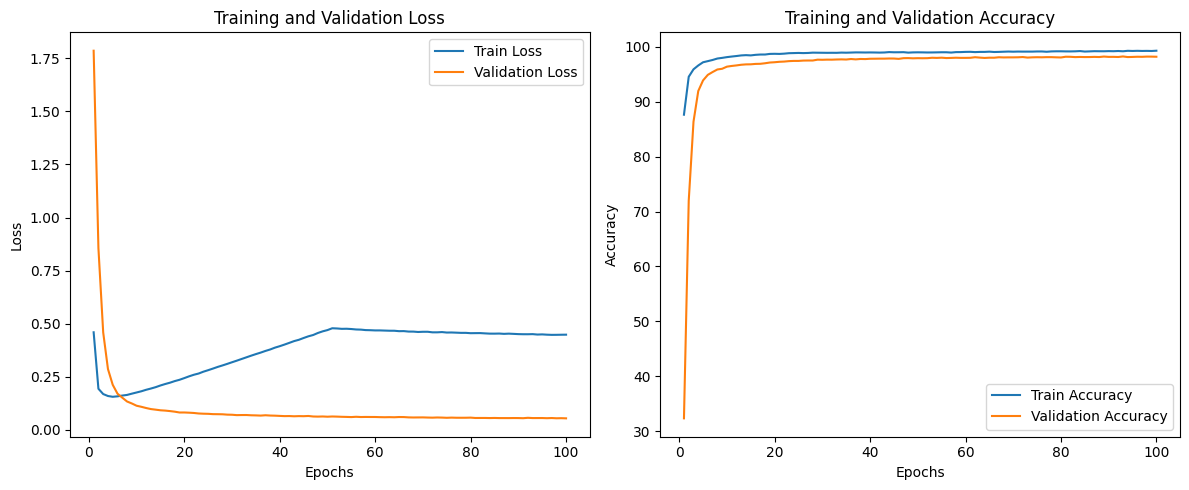

In [180]:
# Plot the metrics
epochs = range(1, num_epochs + 1)

plt.figure(figsize=(12, 5))

# Plot training and validation loss
plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses, label="Train Loss")
plt.plot(epochs, val_losses[:num_epochs], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss")
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracies, label="Train Accuracy")
plt.plot(epochs, val_accuracies[:num_epochs], label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()

plt.tight_layout()
plt.show()

In [181]:
times = measure_inference_time(model, test_loader, device)

Inference Time Measurement Results:
Total Inferences: 469
Average Time: 6.36 ms
Standard Deviation: 0.30 ms
Maximum Time: 8.28 ms
Minimum Time: 5.88 ms


In [182]:
from torch import profiler

dummy_input = torch.randn(32, 3, 224, 224).cuda()

# Profiling inference
with profiler.profile(
    activities=[
       profiler.ProfilerActivity.CPU,
        profiler.ProfilerActivity.CUDA,  # Include if using GPU
    ],
    on_trace_ready=profiler.tensorboard_trace_handler("./logs"),  # Optional logging
    record_shapes=True,
    with_stack=True
) as prof:
    with torch.no_grad():
        model(dummy_input, tau=0.1)


# Print results
print(prof.key_averages().table(sort_by="cuda_time_total" if torch.cuda.is_available() else "cpu_time_total", row_limit=10))

-------------------------------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  
                                                   Name    Self CPU %      Self CPU   CPU total %     CPU total  CPU time avg     Self CUDA   Self CUDA %    CUDA total  CUDA time avg    # of Calls  
-------------------------------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  
                                           aten::matmul        17.36%       2.396ms        37.16%       5.126ms     183.063us       0.000us         0.00%       1.509ms      53.900us            28  
                                           aten::linear         0.83%     114.223us        20.01%       2.761ms     106.191us       0.000us         0.00%       1.168ms      44.931us            26  
         

In [185]:
from sklearn.metrics import f1_score, recall_score, precision_score, roc_curve, auc

def score_evaluate(model, data_loader, criterion, device, phase="Validation"):
    model.eval()
    running_loss = 0.0
    correct = 0
    total = 0

    all_labels = []
    all_preds = []

    with torch.no_grad():
        for inputs, labels in tqdm(data_loader, desc=f"{phase}"):
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs, tau=0.1)
            loss = criterion(outputs, labels)

            running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(predicted.cpu().numpy())

    overall_f1 = f1_score(all_labels, all_preds, average="macro")
    overall_recall = recall_score(all_labels, all_preds, average="macro")
    overall_precision = precision_score(all_labels, all_preds, average="macro")

    f1_per_class = f1_score(all_labels, all_preds, average=None)
    recall_per_class = recall_score(all_labels, all_preds, average=None)
    precision_per_class = precision_score(all_labels, all_preds, average=None)
    class_labels = sorted(set(all_labels))

    epoch_loss = running_loss / len(data_loader)
    accuracy = 100 * correct / total
    print(f"{phase} Loss: {epoch_loss:.4f}, {phase} Accuracy: {accuracy:.2f}%")
    val_losses.append(epoch_loss)
    val_accuracies.append(accuracy)

    print(f"Overall - F1: {overall_f1:.4f}, Recall: {overall_recall:.4f}, Precision: {overall_precision:.4f}")
    print("Per-Class Metrics:")
    for i, label in enumerate(class_labels):
        print(f"Class {label} - F1: {f1_per_class[i]:.4f}, Recall: {recall_per_class[i]:.4f}, Precision: {precision_per_class[i]:.4f}")

    return overall_f1, overall_recall, overall_precision, f1_per_class, recall_per_class, precision_per_class

In [198]:
overall_f1, overall_recall, overall_precision, f1_per_class, recall_per_class, precision_per_class = score_evaluate(model, test_loader, criterion, device, phase="Test")

Test: 100%|██████████| 469/469 [00:21<00:00, 21.55it/s]


Test Loss: 0.0602, Test Accuracy: 98.04%
Overall - F1: 0.9801, Recall: 0.9804, Precision: 0.9798
Per-Class Metrics:
Class 0 - F1: 0.9978, Recall: 0.9974, Precision: 0.9981
Class 1 - F1: 0.9994, Recall: 0.9994, Precision: 0.9994
Class 2 - F1: 0.9747, Recall: 0.9716, Precision: 0.9779
Class 3 - F1: 0.9974, Recall: 0.9983, Precision: 0.9965
Class 4 - F1: 0.9731, Recall: 0.9903, Precision: 0.9566
Class 5 - F1: 0.9819, Recall: 0.9768, Precision: 0.9871
Class 6 - F1: 0.9678, Recall: 0.9589, Precision: 0.9768
Class 7 - F1: 0.9527, Recall: 0.9572, Precision: 0.9482
Class 8 - F1: 0.9757, Recall: 0.9739, Precision: 0.9776


<Figure size 2000x1200 with 0 Axes>

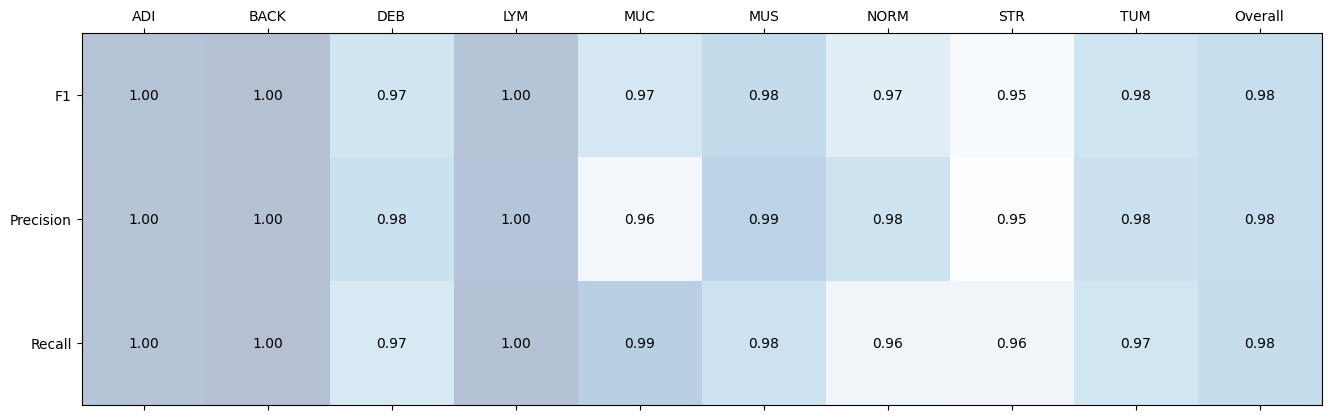

In [188]:
x = ["ADI", "BACK", "DEB", "LYM", "MUC", "MUS", "NORM", 'STR', "TUM"]
y = ["F1", "Precision", "Recall"]

f1_score_list = []
precision_score_list = []
recall_score_list = []

for i, class_name in enumerate(x):
    f1_score_list.append(f1_per_class[i])
    precision_score_list.append(precision_per_class[i])
    recall_score_list.append(recall_per_class[i])

x.append("Overall")
f1_score_list.append(overall_f1)
precision_score_list.append(overall_precision)
recall_score_list.append(overall_recall)

score_list = [f1_score_list, precision_score_list, recall_score_list]
score_list = np.array(score_list)
plt.figure(figsize=(20, 12))
score_cm = plt.matshow(score_list, cmap=plt.cm.Blues, alpha=0.3)
plt.xticks(range(len(x)), x)
plt.yticks(range(len(y)), y)
for i in range(len(y)):
    for j in range(len(x)):
        # 행렬의 각각의 수치를 각 칸의 중앙에 넣어준다
        plt.text(x=j, y=i,
                     s="{:.2f}".format(score_list[i, j]),
                     va='center',
                     ha='center',
                     )

In [189]:
!wget -O CRC-VAL-HE-7K.zip https://zenodo.org/records/1214456/files/CRC-VAL-HE-7K.zip
!unzip -qq CRC-VAL-HE-7K.zip -d val

--2025-03-29 13:00:13--  https://zenodo.org/records/1214456/files/CRC-VAL-HE-7K.zip
Resolving zenodo.org (zenodo.org)... 188.185.43.25, 188.185.48.194, 188.185.45.92, ...
Connecting to zenodo.org (zenodo.org)|188.185.43.25|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 800276929 (763M) [application/octet-stream]
Saving to: ‘CRC-VAL-HE-7K.zip’

CRC-VAL-HE-7K.zip   100%[===================>] 763.20M  17.9MB/s    in 46s     

2025-03-29 13:01:00 (16.7 MB/s) - ‘CRC-VAL-HE-7K.zip’ saved [800276929/800276929]



In [190]:
test_7k_dir = './val/CRC-VAL-HE-7K'

In [191]:
dataset = datasets.ImageFolder(root=test_7k_dir, transform=transform)

In [192]:
import os
#test7k_dataset = Dataset(dir=test_7k_dir, aug=False)
#test7k_dataloader = DataLoader(test7k_dataset, batch_size=32, shuffle=False, num_workers=8, pin_memory=False, drop_last=False)
test7k_dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=False)

In [199]:
overall_f1, overall_recall, overall_precision, f1_per_class, recall_per_class, precision_per_class = score_evaluate(model, test7k_dataloader, criterion, device, phase="Test")

Test: 100%|██████████| 225/225 [00:10<00:00, 21.59it/s]

Test Loss: 0.5289, Test Accuracy: 92.02%
Overall - F1: 0.8845, Recall: 0.8901, Precision: 0.8879
Per-Class Metrics:
Class 0 - F1: 0.9774, Recall: 0.9716, Precision: 0.9834
Class 1 - F1: 0.9576, Recall: 1.0000, Precision: 0.9187
Class 2 - F1: 0.8376, Recall: 0.9735, Precision: 0.7350
Class 3 - F1: 0.9761, Recall: 1.0000, Precision: 0.9534
Class 4 - F1: 0.9755, Recall: 0.9604, Precision: 0.9910
Class 5 - F1: 0.7595, Recall: 0.7095, Precision: 0.8171
Class 6 - F1: 0.9307, Recall: 0.9150, Precision: 0.9469
Class 7 - F1: 0.6058, Recall: 0.5202, Precision: 0.7252
Class 8 - F1: 0.9405, Recall: 0.9611, Precision: 0.9207


<Figure size 2000x1200 with 0 Axes>

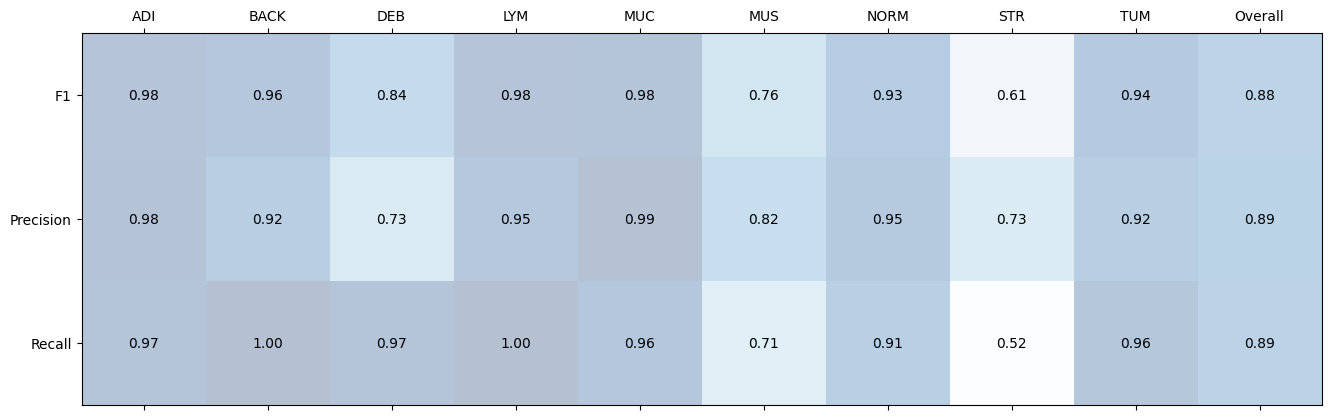

In [194]:
x = ["ADI", "BACK", "DEB", "LYM", "MUC", "MUS", "NORM", 'STR', "TUM"]
y = ["F1", "Precision", "Recall"]

f1_score_list = []
precision_score_list = []
recall_score_list = []

for i, class_name in enumerate(x):
    f1_score_list.append(f1_per_class[i])
    precision_score_list.append(precision_per_class[i])
    recall_score_list.append(recall_per_class[i])

x.append("Overall")
f1_score_list.append(overall_f1)
precision_score_list.append(overall_precision)
recall_score_list.append(overall_recall)

score_list = [f1_score_list, precision_score_list, recall_score_list]
score_list = np.array(score_list)
plt.figure(figsize=(20, 12))
score_cm = plt.matshow(score_list, cmap=plt.cm.Blues, alpha=0.3)
plt.xticks(range(len(x)), x)
plt.yticks(range(len(y)), y)
for i in range(len(y)):
    for j in range(len(x)):
        # 행렬의 각각의 수치를 각 칸의 중앙에 넣어준다
        plt.text(x=j, y=i,
                     s="{:.2f}".format(score_list[i, j]),
                     va='center',
                     ha='center',
                     )

In [195]:
times = measure_inference_time(model, test7k_dataloader, device)

Inference Time Measurement Results:
Total Inferences: 225
Average Time: 7.97 ms
Standard Deviation: 0.91 ms
Maximum Time: 11.61 ms
Minimum Time: 7.18 ms
